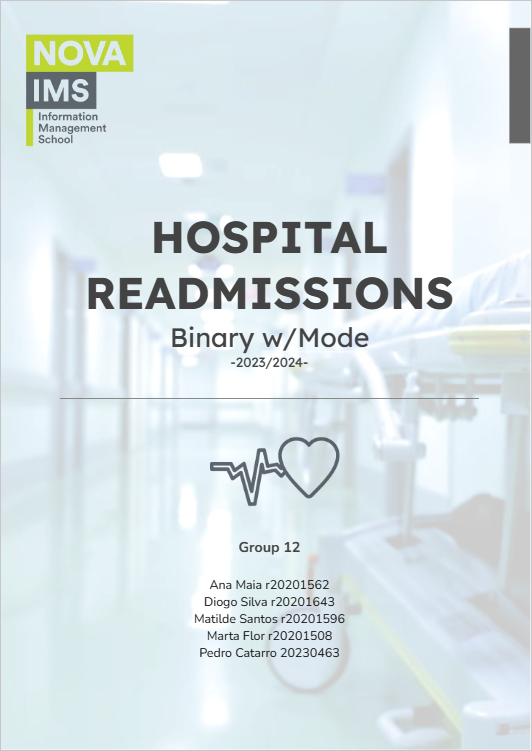
# **Disclaimer**

This notebook isn't neither of the ones we used for the conclusion of the project, it was an experimentation with mode as a way of treating the missing values present in the data, for the porpuse of obtaining better results.

## **Data Exploration**

In [ ]:
!pip install category_encoders
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import make_scorer, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_original = pd.read_csv('C:/Users/Matilde Santos/Documents/novaims/mestrado/1º semestre/machine learning/Project/project_data/train.csv')

In [ ]:
data = df_original.copy()

In [ ]:
data.head(10)

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days
5,269878,USA,279288,Caucasian,Female,[50-60),?,?,0,0,...,250,244,3,NaN,Norm,No,No,[],No,>30 days
6,182051,USA,1566405,Caucasian,Female,[50-60),?,UN,0,0,...,250.02,493,9,NaN,>8,Ch,Yes,"['metformin', 'glimepiride']",No,No
7,964239,USA,60052095,Other,Male,[70-80),?,MC,0,0,...,287,276,9,NaN,NaN,Ch,Yes,"['nateglinide', 'glipizide', 'insulin']",No,No
8,418598,USA,85756257,Caucasian,Female,[50-60),?,MC,1,0,...,250.02,276,9,NaN,NaN,No,Yes,['insulin'],No,No
9,760130,USA,96104214,Caucasian,Female,[70-80),?,MC,0,0,...,398,745,9,NaN,NaN,No,Yes,['insulin'],No,>30 days


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           71236 non-null  int64 
 1   country                                71236 non-null  object
 2   patient_id                             71236 non-null  int64 
 3   race                                   67682 non-null  object
 4   gender                                 71236 non-null  object
 5   age                                    67679 non-null  object
 6   weight                                 71236 non-null  object
 7   payer_code                             71236 non-null  object
 8   outpatient_visits_in_previous_year     71236 non-null  int64 
 9   emergency_visits_in_previous_year      71236 non-null  int64 
 10  inpatient_visits_in_previous_year      71236 non-null  int64 
 11  admission_type 

In [ ]:
# Check the unique values for each column
unique_values_per_column = {}

for column in data.columns:
    unique_values = pd.unique(data[column])
    unique_values_per_column[column] = unique_values

# Print the unique values for each column
for column, unique_values in unique_values_per_column.items():
    print(f"Column '{column}':")
    print(unique_values)
    print("\n")

Column 'encounter_id':
[533253 426224 634063 ... 332030 757560 459757]


Column 'country':
['USA']


Column 'patient_id':
[   70110 29775006 80729253 ... 65777877 24531381  4663818]


Column 'race':
['Caucasian' 'AfricanAmerican' 'Other' nan 'Hispanic' 'Asian' '?']


Column 'gender':
['Female' 'Male' 'Unknown/Invalid']


Column 'age':
['[70-80)' '[50-60)' '[60-70)' '[80-90)' nan '[40-50)' '[20-30)' '[30-40)'
 '[90-100)' '[10-20)' '[0-10)']


Column 'weight':
['?' '[50-75)' '[100-125)' '[75-100)' '[125-150)' '[25-50)' '>200'
 '[0-25)' '[150-175)' '[175-200)']


Column 'payer_code':
['?' 'MC' 'HM' 'UN' 'SP' 'SI' 'CM' 'DM' 'CP' 'MD' 'OG' 'BC' 'PO' 'WC' 'OT'
 'MP' 'CH' 'FR']


Column 'outpatient_visits_in_previous_year':
[ 0  1  2  6  5  3  4  9 36 11  7 16  8 10 12 15 13 20 27 14 35 22 24 21
 17 38 18 37 23 19 25 29 26 42 33 39 34 28]


Column 'emergency_visits_in_previous_year':
[ 0  1  6  2  5  4  9  3 10  7 11 12 13 22  8 14 19 25 20 37 29 28 18 16
 15 21 24 42 76 63]


Column 'inpatie

In [ ]:
# Set the index to encounter_id
data.set_index('encounter_id', inplace = True)

In [ ]:
data.shape

(71236, 30)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71236 entries, 533253 to 459757
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   country                                71236 non-null  object
 1   patient_id                             71236 non-null  int64 
 2   race                                   67682 non-null  object
 3   gender                                 71236 non-null  object
 4   age                                    67679 non-null  object
 5   weight                                 71236 non-null  object
 6   payer_code                             71236 non-null  object
 7   outpatient_visits_in_previous_year     71236 non-null  int64 
 8   emergency_visits_in_previous_year      71236 non-null  int64 
 9   inpatient_visits_in_previous_year      71236 non-null  int64 
 10  admission_type                         67530 non-null  object
 11  medical_specia

In [ ]:
# Summary Statistics for all columns, including categorical columns
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,71236,1,USA,71236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_id,71236.0,NaN,NaN,NaN,54302279.330984,38795850.347332,135.0,23396510.25,45305631.0,87558374.25,189502619.0
race,67682,6,Caucasian,50693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,71236,3,Female,38228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,67679,10,[70-80),17359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,71236,10,?,68990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,71236,18,?,28201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.369588,1.287469,0.0,0.0,0.0,0.0,42.0
emergency_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.196249,0.910854,0.0,0.0,0.0,0.0,76.0
inpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.640154,1.267271,0.0,0.0,0.0,1.0,21.0


In [ ]:
# Check whether we have an unbalanced dataset (i.e., check is the classes of the target variables are not represented equally)
data['readmitted_binary'].value_counts()/len(data) * 100

readmitted_binary
No     88.839912
Yes    11.160088
Name: count, dtype: float64

In [ ]:
data['readmitted_multiclass'].value_counts()/len(data) * 100

readmitted_multiclass
No          53.912348
>30 days    34.927565
<30 days    11.160088
Name: count, dtype: float64

In [ ]:
data.drop("readmitted_multiclass", axis=1, inplace=True)

In [ ]:
# Check if there are Duplicates
data[data.duplicated(keep=False)]

# There are no duplicates

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary
encounter_id,,,,,,,,,,,,,,,,,,,,,


In [ ]:
# Define metric, non-metric features, and target features
metric_features = ["outpatient_visits_in_previous_year", "emergency_visits_in_previous_year", "inpatient_visits_in_previous_year", "average_pulse_bpm" ,"length_of_stay_in_hospital", "number_lab_tests", "non_lab_procedures", "number_of_medications", "number_diagnoses" ]

columns_to_drop = metric_features + ['readmitted_binary']
non_metric_features = data.drop(columns=columns_to_drop).columns.to_list()

target = ['readmitted_binary']

In [ ]:
non_metric_features.remove('patient_id')

In [ ]:
non_metric_features

['country',
 'race',
 'gender',
 'age',
 'weight',
 'payer_code',
 'admission_type',
 'medical_specialty',
 'discharge_disposition',
 'admission_source',
 'primary_diagnosis',
 'secondary_diagnosis',
 'additional_diagnosis',
 'glucose_test_result',
 'a1c_test_result',
 'change_in_meds_during_hospitalization',
 'prescribed_diabetes_meds',
 'medication']

In [ ]:
metric_features

['outpatient_visits_in_previous_year',
 'emergency_visits_in_previous_year',
 'inpatient_visits_in_previous_year',
 'average_pulse_bpm',
 'length_of_stay_in_hospital',
 'number_lab_tests',
 'non_lab_procedures',
 'number_of_medications',
 'number_diagnoses']

## **Incoherence Checking**

In [ ]:
# Check how many duplicate diagnosis exists in the dataset
len(data[(data['primary_diagnosis'] == data['secondary_diagnosis']) |
        (data['primary_diagnosis'] == data['additional_diagnosis']) |
        (data['secondary_diagnosis'] == data['additional_diagnosis'])])

3997

In [ ]:
# If the primary_diagnosis, secondary_diagnosis, or additional_diagnosis repeat then we replace the secondary or additional to 'No Diagnosis'
data.loc[(data['primary_diagnosis'] == data['secondary_diagnosis']), ['secondary_diagnosis']] = 'No Diagnosis'
data.loc[(data['primary_diagnosis'] == data['additional_diagnosis']), ['additional_diagnosis']] = 'No Diagnosis'
data.loc[(data['secondary_diagnosis'] == data['additional_diagnosis']), ['additional_diagnosis']] = 'No Diagnosis'

In [ ]:
# Remove the initial space in the admission_source classes
data['admission_source'] = data['admission_source'].str.replace('^ ', '', regex=True)

In [ ]:
# Remove only 'Expired'
expired = data[data['discharge_disposition'].fillna(' ').str.contains('expired', case = False)]
data.drop(expired.index, axis = 0, inplace = True)

## **Split the dataset (Train and Validation)**


In [ ]:
data_split = data.copy()

In [ ]:
X = data_split.drop('readmitted_binary', axis = 1)
target_binary = data_split['readmitted_binary']

In [ ]:
# Split the data into train and validation

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  target_binary,
                                                  test_size = 0.3,
                                                  random_state = 42,
                                                  stratify = target_binary,
                                                  shuffle = True)
# DEPOIS EXPLICAR PORQUE ESCOLHEMOS CADA UM DESTES VALORES DE PARAMATEROS

In [ ]:
# Convert the target variable to dummy
y_train.replace({'Yes': 1, 'No': 0}, inplace = True)
y_train.unique()

array([0, 1], dtype=int64)

In [ ]:
#Convert the target variable to dummy - FOR VALIDATION
y_val.replace({'Yes': 1, 'No': 0}, inplace = True)
y_val.unique()

array([0, 1], dtype=int64)

In [ ]:
y_train

encounter_id
985437    0
596531    0
265974    0
395716    0
648737    0
         ..
891596    0
739421    0
557224    0
255314    1
609273    0
Name: readmitted_binary, Length: 49065, dtype: int64

In [ ]:
y_val

encounter_id
721473    0
863681    0
662766    0
273271    1
225083    0
         ..
466801    0
463871    0
310297    0
259152    0
209678    0
Name: readmitted_binary, Length: 21029, dtype: int64

## **Treating Outliers**

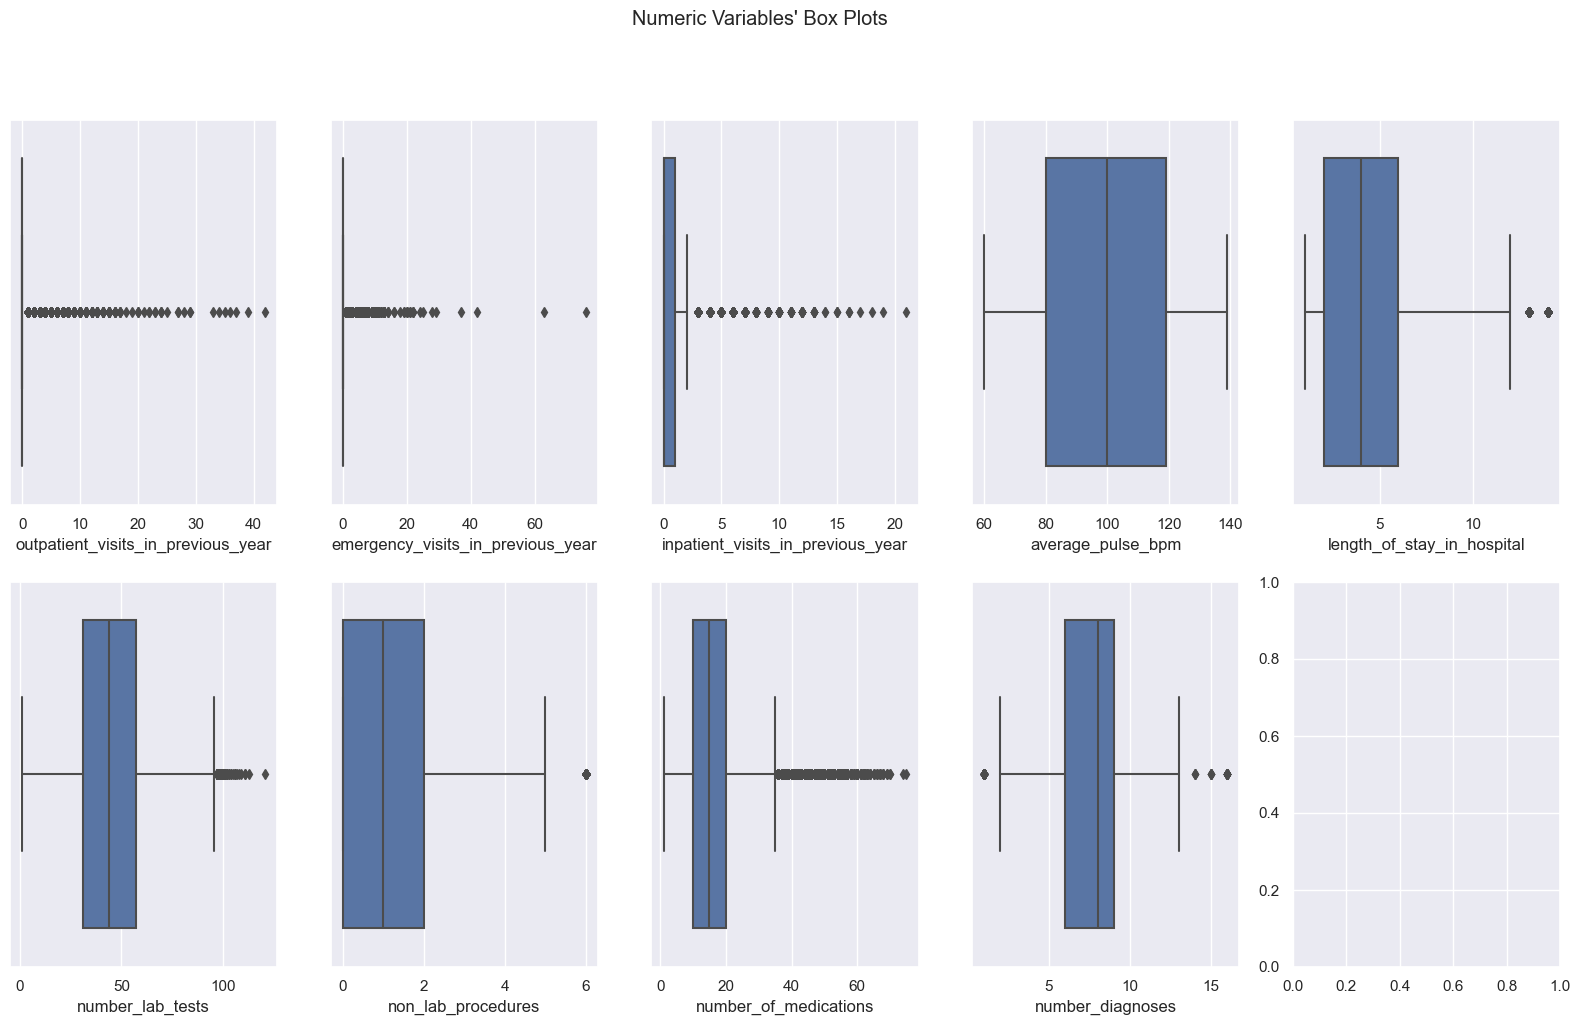

In [ ]:
#Plot boxplot

sns.set()

fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x = X_train[feat], ax = ax)

title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [ ]:
'''plt.hist(X_train["number_lab_tests"], bins=15)
plt.show()'''

'plt.hist(X_train["number_lab_tests"], bins=15)\nplt.show()'

In [ ]:
'''plt.hist(X_train["non_lab_procedures"], bins=10)
plt.show()'''

'plt.hist(X_train["non_lab_procedures"], bins=10)\nplt.show()'

In [ ]:
'''plt.hist(X_train["number_diagnoses"], bins=15)
plt.show()'''

'plt.hist(X_train["number_diagnoses"], bins=15)\nplt.show()'

In [ ]:
'''len(X_train[X_train["outpatient_visits_in_previous_year"] > 30])'''

'len(X_train[X_train["outpatient_visits_in_previous_year"] > 30])'

In [ ]:
'''len(X_train[X_train["emergency_visits_in_previous_year"] > 30])'''

'len(X_train[X_train["emergency_visits_in_previous_year"] > 30])'

In [ ]:
'''len(X_train[X_train["inpatient_visits_in_previous_year"] > 17])'''

'len(X_train[X_train["inpatient_visits_in_previous_year"] > 17])'

In [ ]:
'''len(X_train[X_train["length_of_stay_in_hospital"] > 13])'''

'len(X_train[X_train["length_of_stay_in_hospital"] > 13])'

In [ ]:
'''len(X_train[X_train["number_lab_tests"] > 100])'''

'len(X_train[X_train["number_lab_tests"] > 100])'

In [ ]:
'''len(X_train[X_train["non_lab_procedures"] > 5])'''

'len(X_train[X_train["non_lab_procedures"] > 5])'

In [ ]:
'''len(X_train[X_train["number_of_medications"] > 65])'''

'len(X_train[X_train["number_of_medications"] > 65])'

In [ ]:
'''len(X_train[X_train["number_of_medications"] > 38])'''

'len(X_train[X_train["number_of_medications"] > 38])'

In [ ]:
'''len(X_train[(X_train["number_diagnoses"] < 2) | (X_train["number_diagnoses"] > 13)])'''

'len(X_train[(X_train["number_diagnoses"] < 2) | (X_train["number_diagnoses"] > 13)])'

In [ ]:
filters1 = (
    (X_train["outpatient_visits_in_previous_year"] <= 30)
    &
    (X_train["emergency_visits_in_previous_year"] <= 30)
    &
    (X_train["inpatient_visits_in_previous_year"] <=  17)
    #&
   #(X_train["length_of_stay_in_hospital"] <= 13)
    &
    (X_train["number_lab_tests"] <= 110)
    &
    (X_train["number_of_medications"] <= 65)
    &
    (X_train["number_diagnoses"] >= 2)
    &
    (X_train["number_diagnoses"] <= 13))

df_1 = X_train[filters1]

In [ ]:
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / X_train.shape[0], 4))

Percentage of data kept after removing outliers: 0.9964


In [ ]:
# Outlier removal using only the IQR method

q25 = X_train[metric_features].quantile(.25)
q75 = X_train[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(X_train[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0))
df_2 = X_train[filters2.values]

print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / X_train.shape[0], 4))

Percentage of data kept after removing outliers: 0.6635


In [ ]:
# Combine both methods (Manual and Boxplot)
df_3 = X_train[(filters1 | filters2)]
print('Percentage of data kept after removing outliers:', np.round(df_3.shape[0] / X_train.shape[0], 4))

Percentage of data kept after removing outliers: 0.9964


In [ ]:
#Update X_train
X_train = df_3.copy()

In [ ]:
# Keep the same rows of X_train in y_train
y_train = y_train.loc[X_train.index]

In [ ]:
y_train.index == X_train.index

array([ True,  True,  True, ...,  True,  True,  True])

## **Missing Values**

In [ ]:
(X_train.isna().sum() / len(X_train) * 100).round(3)

country                                   0.000
patient_id                                0.000
race                                      5.073
gender                                    0.000
age                                       4.954
weight                                    0.000
payer_code                                0.000
outpatient_visits_in_previous_year        0.000
emergency_visits_in_previous_year         0.000
inpatient_visits_in_previous_year         0.000
admission_type                            5.259
medical_specialty                         0.000
average_pulse_bpm                         0.000
discharge_disposition                     3.712
admission_source                          6.588
length_of_stay_in_hospital                0.000
number_lab_tests                          0.000
non_lab_procedures                        0.000
number_of_medications                     0.000
primary_diagnosis                         0.000
secondary_diagnosis                     

In [ ]:
X_train.isna().sum()

country                                      0
patient_id                                   0
race                                      2480
gender                                       0
age                                       2422
weight                                       0
payer_code                                   0
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            2571
medical_specialty                            0
average_pulse_bpm                            0
discharge_disposition                     1815
admission_source                          3221
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            0
secondary_diagnosis                          0
additional_di

In [ ]:
X_val.isna().sum()

country                                      0
patient_id                                   0
race                                      1017
gender                                       0
age                                       1081
weight                                       0
payer_code                                   0
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            1079
medical_specialty                            0
average_pulse_bpm                            0
discharge_disposition                      772
admission_source                          1401
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            0
secondary_diagnosis                          0
additional_di

In [ ]:
#Replace all "?", "Unknown/Invalid", "Not Available", "Not Mapped", " " , '[]'  values by nan

X_train = X_train.replace(["?", "Unknown/Invalid", "Not Available", "Not Mapped", " " , '[]' ],np.nan)

# Repeat for Validation
X_val = X_val.replace(["?", "Unknown/Invalid", "Not Available", "Not Mapped", " ", '[]' ],np.nan)

In [ ]:
# The non-code values in 'payer_code' ("?") are due to people that don´t have insurance
# Hence, we imputed them with the label 'No Insurance'.

X_train["payer_code"].replace(np.nan, "No Insurance", inplace = True)

#Repeat for validation
X_val["payer_code"].replace(np.nan, "No Insurance", inplace = True)

In [ ]:
# The missing values in 'glucose_test_result' and 'a1c_test_result' are due to patients not taking these tests.
# Hence, we imputed them with the label 'Not Taken'.

X_train["glucose_test_result"].replace(np.nan, "Not Taken", inplace = True)
X_train["a1c_test_result"].replace(np.nan, "Not Taken",  inplace = True)

#Repeat for Validation
X_val["glucose_test_result"].replace(np.nan, "Not Taken", inplace = True)
X_val["a1c_test_result"].replace(np.nan, "Not Taken",  inplace = True)

In [ ]:
X_train['admission_source'].replace(np.nan, "Not Mapped", inplace = True)

#Repeat for Validation
X_val['admission_source'].replace(np.nan, "Not Mapped", inplace = True)

In [ ]:
X_train['medication'].replace(np.nan, 'No Medication', inplace = True)

#Repeat for Validation
X_val['medication'].replace(np.nan, 'No Medication', inplace = True)

In [ ]:
X_train['secondary_diagnosis'].replace(np.nan, "No Diagnosis", inplace = True)
X_train['additional_diagnosis'].replace(np.nan, "No Diagnosis", inplace = True)

#Repeat for Validation
X_val['secondary_diagnosis'].replace(np.nan, "No Diagnosis", inplace = True)
X_val['additional_diagnosis'].replace(np.nan, "No Diagnosis", inplace = True)

# **Missing Values Treatment**

### Mode imputation

In [ ]:
train_mv = X_train.copy()
val_mv = X_val.copy()

In [ ]:
# Drop columns that have really high percentage of missing values (> 50%)
train_mv.drop(["weight"], axis=1, inplace=True)
non_metric_features.remove("weight")

# REPEAT FOR VALIDATION
val_mv.drop(["weight"], axis=1, inplace=True)

In [ ]:
features_to_impute = ['race', 'gender','age', 'admission_type', 'discharge_disposition',
                      'primary_diagnosis', "medical_specialty"]

In [ ]:
modes = train_mv[features_to_impute].mode().loc[0]
modes

race                              Caucasian
gender                               Female
age                                 [70-80)
admission_type                    Emergency
discharge_disposition    Discharged to home
primary_diagnosis                       428
medical_specialty          InternalMedicine
Name: 0, dtype: object

In [ ]:
# Replace the missing values of the categorial features with the mode
train_mv.fillna(modes, inplace=True)

In [ ]:
# Repeat for validation
val_mv.fillna(modes, inplace=True)

In [ ]:
# Check the variables summary statistics AFTER IMPUTATION
train_mv[features_to_impute].describe().T.round(3)

,count,unique,top,freq
race,48890,5,Caucasian,38306
gender,48890,2,Female,26336
age,48890,10,[70-80),14408
admission_type,48890,5,Emergency,30740
discharge_disposition,48890,21,Discharged to home,31736
primary_diagnosis,48890,645,428,3277
medical_specialty,48890,65,InternalMedicine,31069


In [ ]:
train_mv.isna().sum()

country                                  0
patient_id                               0
race                                     0
gender                                   0
age                                      0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
primary_diagnosis                        0
secondary_diagnosis                      0
additional_diagnosis                     0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_re

In [ ]:
val_mv.isna().sum()

country                                  0
patient_id                               0
race                                     0
gender                                   0
age                                      0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
primary_diagnosis                        0
secondary_diagnosis                      0
additional_diagnosis                     0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_re

In [ ]:
X_train = train_mv.copy()
X_val = val_mv.copy()

# **Feature Engenniring**

**total_encounters**: count the number of encounters by patient id

In [ ]:
X_train['total_encounters'] = X_train.groupby('patient_id')['patient_id'].transform('count')

In [ ]:
X_val['total_encounters'] = X_val.groupby('patient_id')['patient_id'].transform('count')

In [ ]:
X_train.drop(["patient_id"], axis=1, inplace=True)
X_val.drop(["patient_id"], axis=1, inplace=True)

**total_visits_in_previous_year**: Number of outpatient, emergency, and inpatient visits the patient made to the hospital in the year preceding the encounter.

In [ ]:
X_train['total_visits_in_previous_year'] = X_train['outpatient_visits_in_previous_year'] + X_train['emergency_visits_in_previous_year'] + X_train['inpatient_visits_in_previous_year']

In [ ]:
X_val['total_visits_in_previous_year'] = X_val['outpatient_visits_in_previous_year'] + X_val['emergency_visits_in_previous_year'] + X_val['inpatient_visits_in_previous_year']

**primary_diagnoses_categories, secondary_diagnoses_categories, additional_diagnoses_categories**: Variables represent the ICD9 Codes grouped in categories.

In [ ]:
# Based on the ICD9 Codes, we will create a variable that groups the codes into categories.
def categorize_icd9(icd9_code):

    icd9_code = str(icd9_code)

    if '001' <= icd9_code <= '139':   return 'Infectious and Parasitic Diseases'

    elif '140' <= icd9_code <= '239': return 'Neoplasms'

    elif '240' <= icd9_code <= '279': return 'Endocrine, Nutritional, and Metabolic Diseases, and Immunity Disorders'

    elif '280' <= icd9_code <= '289': return 'Diseases of the Blood and Blood-Forming Organs'

    elif '290' <= icd9_code <= '319': return 'Mental Disorders'

    elif '320' <= icd9_code <= '389': return 'Diseases of the Nervous System and Sense Organs'

    elif '390' <= icd9_code <= '459': return 'Diseases of the Circulatory System'

    elif '460' <= icd9_code <= '519': return 'Diseases of the Respiratory System'

    elif '520' <= icd9_code <= '579': return 'Diseases of the Digestive System'

    elif '580' <= icd9_code <= '629': return 'Diseases of the Genitourinary System'

    elif '630' <= icd9_code <= '679': return 'Complications of Pregnancy, Childbirth, and the Puerperium'

    elif '680' <= icd9_code <= '709': return 'Diseases of the Skin and Subcutaneous Tissue'

    elif '710' <= icd9_code <= '739': return 'Diseases of the Musculoskeletal System and Connective Tissue'

    elif '740' <= icd9_code <= '759': return 'Congenital Anomalies'

    elif '760' <= icd9_code <= '779': return 'Certain Conditions Originating in the Perinatal Period'

    elif '780' <= icd9_code <= '799': return 'Symptoms, Signs, and Ill-Defined Conditions'

    elif '800' <= icd9_code <= '999': return 'Injury and Poisoning'

    elif icd9_code.startswith(('E', 'V')):  return 'External Causes of Injury and Supplemental Classification'

    else:return 'Uncategorized'

In [ ]:
X_train['primary_diagnoses_categories'] = (X_train['primary_diagnosis'].apply(categorize_icd9))
X_train['secondary_diagnoses_categories'] = (X_train['secondary_diagnosis'].apply(categorize_icd9))
X_train['additional_diagnoses_categories'] = (X_train['additional_diagnosis'].apply(categorize_icd9))

In [ ]:
X_train['primary_diagnoses_categories'].unique()

array(['Symptoms, Signs, and Ill-Defined Conditions', 'Mental Disorders',
       'Diseases of the Circulatory System',
       'Diseases of the Respiratory System',
       'Endocrine, Nutritional, and Metabolic Diseases, and Immunity Disorders',
       'External Causes of Injury and Supplemental Classification',
       'Diseases of the Blood and Blood-Forming Organs',
       'Diseases of the Digestive System',
       'Diseases of the Musculoskeletal System and Connective Tissue',
       'Neoplasms', 'Diseases of the Genitourinary System',
       'Injury and Poisoning',
       'Diseases of the Skin and Subcutaneous Tissue',
       'Diseases of the Nervous System and Sense Organs',
       'Complications of Pregnancy, Childbirth, and the Puerperium',
       'Uncategorized', 'Infectious and Parasitic Diseases',
       'Congenital Anomalies'], dtype=object)

In [ ]:
# Repeat for Validation
X_val['primary_diagnoses_categories'] = (X_val['primary_diagnosis'].apply(categorize_icd9))
X_val['secondary_diagnoses_categories'] = (X_val['secondary_diagnosis'].apply(categorize_icd9))
X_val['additional_diagnoses_categories'] = (X_val['additional_diagnosis'].apply(categorize_icd9))

**insulation_medication**: Defines if the patient takes insuline.

In [ ]:
print('Encounters where patients took insulin and metformin:',
     ((X_train['medication'].astype(str).str.contains('insulin'))
     & X_train['medication'].astype(str).str.contains('metformin')).sum(),

     '\nEncounters where patients took only insulin:',
     ((X_train['medication'].astype(str).str.contains('insulin'))
     & ~X_train['medication'].astype(str).str.contains('metformin')).sum(),

     '\nEncounters where patients took only metformin:',
     (~X_train['medication'].astype(str).str.contains('insulin')
     & X_train['medication'].astype(str).str.contains('metformin')).sum())

Encounters where patients took insulin and metformin: 5045 
Encounters where patients took only insulin: 21018 
Encounters where patients took only metformin: 5029


**type2**: Defines if the patient has type 2 diabetes.

In [ ]:
# Insulin is used in the treatment and management of diabetes mellitus type-1 and sometimes diabetes mellitus type-2
# Metformin is a medicine used to treat type 2 diabetes and gestational diabetes

# Create a new column with a default value
X_train['type2'] = np.nan

X_train.loc[ ~X_train['medication'].astype(str).str.contains('metformin'), 'type2'] = 0

X_train.loc[ X_train['medication'].astype(str).str.contains('metformin'), 'type2'] = 1

In [ ]:
# Insulin is used in the treatment and management of diabetes mellitus type-1 and sometimes diabetes mellitus type-2
# Metformin is a medicine used to treat type 2 diabetes and gestational diabetes

# Create a new column with a default value
X_val['type2'] = np.nan

X_val.loc[ ~X_val['medication'].astype(str).str.contains('metformin'), 'type2'] = 0

X_val.loc[ X_val['medication'].astype(str).str.contains('metformin'), 'type2'] = 1

**diagnosed_diabetes**: Column take states whether the patients was diagnosed with diabetes.

Classes: 0 - No Diabetes | 1 - Diabetes

In [ ]:
# https://www.ncbi.nlm.nih.gov/books/NBK368403/table/sb203.t5/

print(
    'Diabetes in Primary Diagnosis:', len(X_train.loc[X_train['primary_diagnosis'].astype(str).str.contains('250')]),
    '\nDiabetes in Secondary Diagnosis:', len(X_train.loc[X_train['secondary_diagnosis'].astype(str).str.contains('250')]),
    '\nDiabetes in Additional Diagnosis:', len(X_train.loc[X_train['additional_diagnosis'].astype(str).str.contains('250')])
)

Diabetes in Primary Diagnosis: 4093 
Diabetes in Secondary Diagnosis: 6133 
Diabetes in Additional Diagnosis: 8288


In [ ]:
print(
'Only the first diagnosis:',
(X_train['primary_diagnosis'].astype(str).str.contains('250')
& ~X_train['secondary_diagnosis'].astype(str).str.contains('250')
& ~X_train['additional_diagnosis'].astype(str).str.contains('250')).sum(),

'\nFirst 2 diagnosis have diabetes:',
(X_train['primary_diagnosis'].astype(str).str.contains('250')
& X_train['secondary_diagnosis'].astype(str).str.contains('250')
& ~X_train['additional_diagnosis'].astype(str).str.contains('250')).sum(),

'\nAll 3 diagnosis have diabetes:',
(X_train['primary_diagnosis'].astype(str).str.contains('250')
& X_train['secondary_diagnosis'].astype(str).str.contains('250')
& X_train['additional_diagnosis'].astype(str).str.contains('250')).sum())

Only the first diagnosis: 3916 
First 2 diagnosis have diabetes: 44 
All 3 diagnosis have diabetes: 7


In [ ]:
X_train['diagnosed_diabetes'] = np.nan

# If the patient was diagnosed with diabetes in any diagnosis (1: 'Yes')
X_train.loc[  X_train['primary_diagnosis'].astype(str).str.contains('250')
                  | X_train['secondary_diagnosis'].astype(str).str.contains('250')
                  | X_train['additional_diagnosis'].astype(str).str.contains('250'), 'diagnosed_diabetes'] = 1

# If the patient was not diagnosed with diabetes in any diagnosis (0: 'No')
X_train.loc[~X_train['primary_diagnosis'].astype(str).str.contains('250')
                  & ~X_train['secondary_diagnosis'].astype(str).str.contains('250')
                  & ~X_train['secondary_diagnosis'].astype(str).str.contains('250'), 'diagnosed_diabetes'] = 0

In [ ]:
(X_train['diagnosed_diabetes'].value_counts() / len(X_train) * 100).round(2)

diagnosed_diabetes
0.0    79.19
1.0    20.81
Name: count, dtype: float64

In [ ]:
X_train.head(5)

,country,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,...,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,total_encounters,total_visits_in_previous_year,primary_diagnoses_categories,secondary_diagnoses_categories,additional_diagnoses_categories,type2,diagnosed_diabetes
encounter_id,,,,,,,,,,,,,,,,,,,,,
985437,USA,Caucasian,Female,[70-80),MC,1,0,0,Emergency,InternalMedicine,...,No,No,No Medication,2,1,"Symptoms, Signs, and Ill-Defined Conditions",Infectious and Parasitic Diseases,"Endocrine, Nutritional, and Metabolic Diseases...",0.0,0.0
596531,USA,AfricanAmerican,Female,[60-70),MC,0,0,0,Urgent,InternalMedicine,...,No,Yes,['insulin'],1,0,Mental Disorders,Diseases of the Circulatory System,Diseases of the Skin and Subcutaneous Tissue,0.0,0.0
265974,USA,Caucasian,Female,[60-70),No Insurance,0,0,0,Emergency,Cardiology,...,Ch,Yes,"['pioglitazone', 'insulin']",1,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diseases of the Respiratory System,0.0,0.0
395716,USA,Caucasian,Male,[70-80),No Insurance,0,0,1,Urgent,InternalMedicine,...,No,Yes,['glipizide'],1,1,Diseases of the Respiratory System,Diseases of the Blood and Blood-Forming Organs,Injury and Poisoning,0.0,0.0
648737,USA,Caucasian,Male,[60-70),CM,0,0,0,Emergency,InternalMedicine,...,Ch,Yes,"['glyburide', 'rosiglitazone', 'insulin']",1,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diseases of the Circulatory System,0.0,0.0


In [ ]:
# REPEAT FOR VALIDATION
X_val['diagnosed_diabetes'] = np.nan

# If the patient was diagnosed with diabetes in any diagnosis
X_val.loc[X_val['primary_diagnosis'].astype(str).str.contains('250')
                  | X_val['secondary_diagnosis'].astype(str).str.contains('250')
                  | X_val['additional_diagnosis'].astype(str).str.contains('250'), 'diagnosed_diabetes'] = 1

# If the patient was not diagnosed with diabetes in any diagnosis
X_val.loc[~X_val['primary_diagnosis'].astype(str).str.contains('250')
                  & ~X_val['secondary_diagnosis'].astype(str).str.contains('250')
                  & ~X_val['secondary_diagnosis'].astype(str).str.contains('250'), 'diagnosed_diabetes'] = 0

In [ ]:
X_val.head(5)

,country,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,...,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,total_encounters,total_visits_in_previous_year,primary_diagnoses_categories,secondary_diagnoses_categories,additional_diagnoses_categories,type2,diagnosed_diabetes
encounter_id,,,,,,,,,,,,,,,,,,,,,
721473,USA,Caucasian,Male,[40-50),MD,0,0,0,Emergency,Emergency/Trauma,...,No,Yes,['insulin'],1,0,Diseases of the Circulatory System,"Endocrine, Nutritional, and Metabolic Diseases...",Diseases of the Respiratory System,0.0,1.0
863681,USA,Caucasian,Female,[40-50),HM,0,0,0,Emergency,Family/GeneralPractice,...,No,Yes,['rosiglitazone'],1,0,Diseases of the Respiratory System,Mental Disorders,"Endocrine, Nutritional, and Metabolic Diseases...",0.0,0.0
662766,USA,Caucasian,Female,[60-70),HM,0,0,0,Emergency,InternalMedicine,...,No,Yes,['glyburide'],1,0,Diseases of the Circulatory System,Diseases of the Nervous System and Sense Organs,Diseases of the Circulatory System,0.0,0.0
273271,USA,Caucasian,Female,[70-80),No Insurance,0,0,0,Emergency,InternalMedicine,...,No,Yes,['insulin'],1,0,Diseases of the Respiratory System,"Endocrine, Nutritional, and Metabolic Diseases...",Mental Disorders,0.0,0.0
225083,USA,Caucasian,Female,[70-80),No Insurance,1,0,2,Emergency,InternalMedicine,...,No,Yes,['insulin'],1,3,Diseases of the Digestive System,"Endocrine, Nutritional, and Metabolic Diseases...",Uncategorized,0.0,0.0


**race**: Group 'Asian', 'Hispanic', and 'Other.

In [ ]:
# Replace values in 'race' and create a new column 'Caucasian'
X_train['race'] = X_train['race'].replace({'Hispanic': 'Other','Asian': 'Other'})

In [ ]:
# Replace values in 'race' and create a new column 'Caucasian'
X_val['race'] = X_val['race'].replace({'Hispanic': 'Other', 'Asian': 'Other'})

<Axes: xlabel='race', ylabel='Count'>

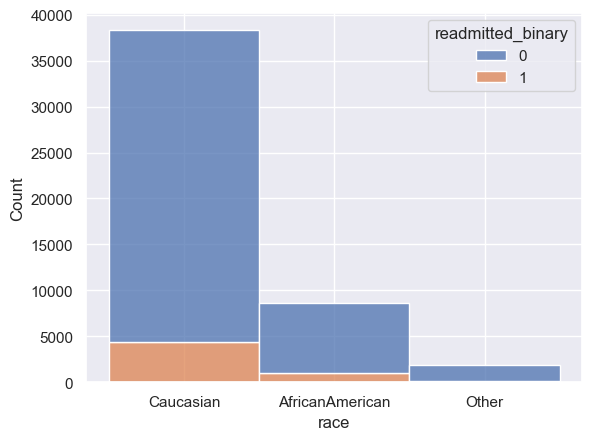

In [ ]:
sns.histplot(data = X_train, x = "race", hue = y_train, multiple = "stack")

**Female**: Binary Variable that indicates if the patient is female (1) or not (0)

In [ ]:
X_train['Female'] = X_train['gender'].replace({'Female': 1,'Male': 0})
X_train['Female'].value_counts()

Female
1    26336
0    22554
Name: count, dtype: int64

In [ ]:
X_val['Female'] = X_val['gender'].replace({'Female': 1, 'Male': 0})
X_val['Female'].value_counts()

Female
1    11243
0     9786
Name: count, dtype: int64

In [ ]:
X_train.drop('gender', axis = 1, inplace = True)
X_val.drop('gender', axis = 1, inplace = True)

In [ ]:
non_metric_features.remove('gender')

**age**: Transform variable in numeric by doing the mean between the 2 interval values.

<Axes: xlabel='age', ylabel='Count'>

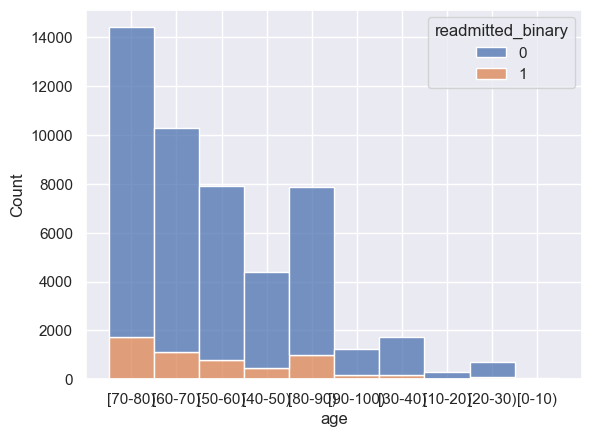

In [ ]:
sns.histplot(data = X_train, x = "age", hue = y_train, multiple = "stack")

In [ ]:
X_train['age'] = X_train['age'].replace({'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
                                        '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95})
X_train['age'].value_counts()

age
75    14408
65    10266
55     7896
85     7878
45     4401
35     1733
95     1247
25      717
15      292
5        52
Name: count, dtype: int64

In [ ]:
X_val['age'] = X_val['age'].replace({'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
                                    '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95})

**payer_code**: Decrease the number of categories (Group classess that represent less than 5% of the dataset)

<Axes: xlabel='payer_code', ylabel='Count'>

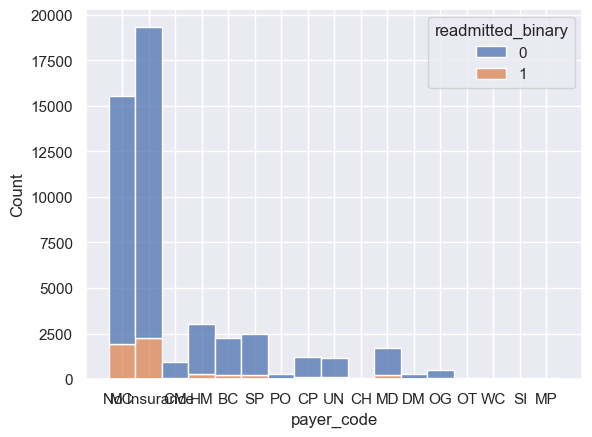

In [ ]:
sns.histplot(data = X_train, x = "payer_code", hue = y_train, multiple = "stack")
# The categories 'No insurance' and 'MC' are the most relevant ones

In [ ]:
X_train['payer_code'].value_counts(normalize = True)

payer_code
No Insurance    0.395357
MC              0.317693
HM              0.061321
SP              0.050522
BC              0.046083
MD              0.034854
CP              0.024627
UN              0.024177
CM              0.019206
OG              0.009941
PO              0.005727
DM              0.005379
CH              0.001473
WC              0.001411
OT              0.000798
MP              0.000798
SI              0.000634
Name: proportion, dtype: float64

In [ ]:
X_train['payer_code'] = X_train['payer_code'].replace({'MP': 'Other','FR': 'Other','SI': 'Other','CH': 'Other',
                                                   'PO': 'Other','OT': 'Other','WC': 'Other','DM': 'Other',
                                                   'OG': 'Other','CM': 'Other', 'UN': 'Other', 'CP': 'Other', 'MD': 'Other',
                                                   'BC': 'Other'})
X_train['payer_code'].value_counts()

payer_code
No Insurance    19329
MC              15532
Other            8561
HM               2998
SP               2470
Name: count, dtype: int64

In [ ]:
# Convert the target variable to dummy
X_val['payer_code'] = X_val['payer_code'].replace({'MP': 'Other','FR': 'Other','SI': 'Other','CH': 'Other',
                                                   'PO': 'Other','OT': 'Other','WC': 'Other','DM': 'Other',
                                                   'OG': 'Other','CM': 'Other', 'UN': 'Other', 'CP': 'Other', 'MD': 'Other',
                                                   'BC': 'Other'})

**admitted_urgent/emergency**: Defines if the patient was admitted has 'Emergency' or 'Urgent

<Axes: xlabel='admission_type', ylabel='Count'>

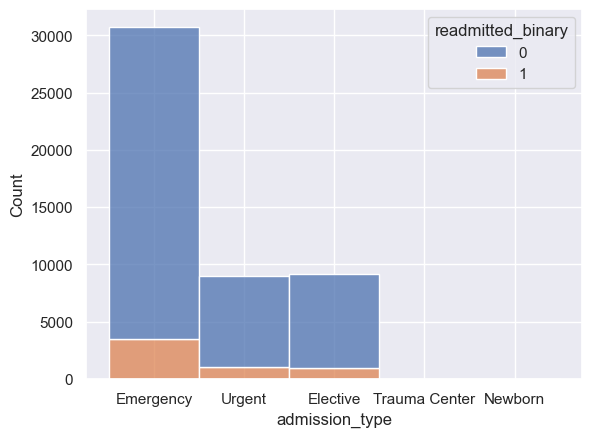

In [ ]:
sns.histplot(data = X_train, x = 'admission_type', hue = y_train, multiple = "stack")

In [ ]:
# Create a binary variable indicating if the index admission was through the ED
X_train['admitted_urgent/emergency'] = np.nan

# If the admission source is Emergency or Urgent, set 'admitted_urgent/emergency' to 1
X_train.loc[(X_train['admission_type'] == 'Emergency') | (X_train['admission_type'] == 'Urgent'), 'admitted_urgent/emergency'] = 1

# If the admission source is not Emergency and not Urgent, set 'admitted_urgent/emergency' to 0
X_train.loc[(X_train['admission_type'] != 'Emergency') & (X_train['admission_type'] != 'Urgent'), 'admitted_urgent/emergency'] = 0

X_train['admitted_urgent/emergency'].value_counts()

admitted_urgent/emergency
1.0    39725
0.0     9165
Name: count, dtype: int64

In [ ]:
# Create a binary variable indicating if the index admission was through the ED
X_val['admitted_urgent/emergency'] = np.nan

# If the admission source is Emergency or Urgent, set 'admitted_urgent/emergency' to 1
X_val.loc[(X_val['admission_type'] == 'Emergency') | (X_val['admission_type'] == 'Urgent'), 'admitted_urgent/emergency'] = 1

# If the admission source is not Emergency and not Urgent, set 'admitted_urgent/emergency' to 0
X_val.loc[(X_val['admission_type'] != 'Emergency') & (X_val['admission_type'] != 'Urgent'), 'admitted_urgent/emergency'] = 0

X_val['admitted_urgent/emergency'].value_counts()

admitted_urgent/emergency
1.0    17084
0.0     3945
Name: count, dtype: int64

medical_speciality: less categories (group the classes that have less than 2 % of observations)

In [ ]:
# Surgery
X_train['medical_specialty'].replace({'Surgery-Cardiovascular/Thoracic': 'Surgery', 'Surgery-General': 'Surgery',
                                      'SurgicalSpecialty': 'Surgery', 'Surgery-Vascular': 'Surgery',
                                      'Surgery-Cardiovascular': 'Surgery', 'Surgery-Thoracic': 'Surgery',
                                      'Surgery-Maxillofacial': 'Surgery',  'Surgery-Plastic': 'Surgery',
                                      'Surgeon': 'Surgery', 'Surgery-Pediatric': 'Surgery', 'Surgery-Neuro': 'Surgery',
                                      'Surgery-Colon&Rectal': 'Surgery'}, inplace = True)

X_val['medical_specialty'].replace({'Surgery-Cardiovascular/Thoracic': 'Surgery', 'Surgery-General': 'Surgery',
                                      'SurgicalSpecialty': 'Surgery', 'Surgery-Vascular': 'Surgery',
                                      'Surgery-Cardiovascular': 'Surgery', 'Surgery-Thoracic': 'Surgery',
                                      'Surgery-Maxillofacial': 'Surgery',  'Surgery-Plastic': 'Surgery',
                                      'Surgeon': 'Surgery', 'Surgery-Pediatric': 'Surgery', 'Surgery-Neuro': 'Surgery',
                                      'Surgery-Colon&Rectal': 'Surgery'}, inplace = True)

In [ ]:
X_train['medical_specialty'].replace({'Psychiatry-Child/Adolescent': 'Psychiatry'}, inplace = True)

X_val['medical_specialty'].replace({'Psychiatry-Child/Adolescent': 'Psychiatry'}, inplace = True)

In [ ]:
X_train['medical_specialty'].replace({'ObstetricsandGynecology': "Women's Health", 'Gynecology': "Women's Health",
                                      'Obsterics&Gynecology-GynecologicOnco': "Women's Health",
                                      'Obstetrics': "Women's Health"}, inplace = True)

X_val['medical_specialty'].replace({'ObstetricsandGynecology': "Women's Health", 'Gynecology': "Women's Health",
                                      'Obsterics&Gynecology-GynecologicOnco': "Women's Health",
                                      'Obstetrics': "Women's Health"}, inplace = True)

<Axes: xlabel='medical_specialty', ylabel='Count'>

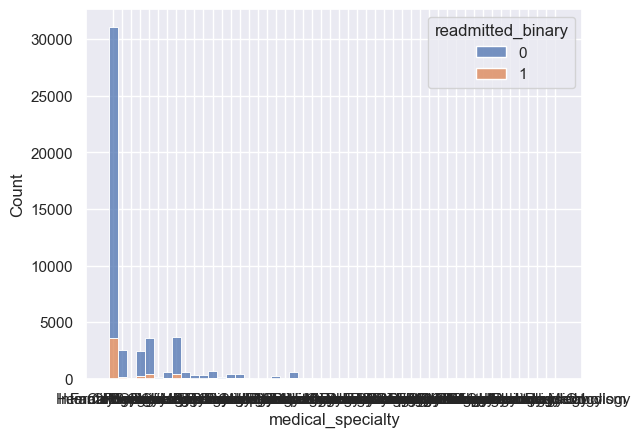

In [ ]:
sns.histplot(data = X_train, x = 'medical_specialty', hue = y_train, multiple = "stack")

**discharge_disposition**: less categories (group the classes that have less than 5% of observations)

In [ ]:
# Within Facility Transfer
X_train['discharge_disposition'].replace({
            "Discharged/transferred to SNF": "Within Facility Transfer",
            'Discharged/transferred/referred to this institution for outpatient services': "Within Facility Transfer",
            "Discharged/transferred to ICF": "Within Facility Transfer",
            "Discharged/transferred within this institution to Medicare approved swing bed": "Within Facility Transfer",
            'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital': "Within Facility Transfer"}, inplace = True)

X_val['discharge_disposition'].replace({
            "Discharged/transferred to SNF": "Within Facility Transfer",
            'Discharged/transferred/referred to this institution for outpatient services': "Within Facility Transfer",
            "Discharged/transferred to ICF": "Within Facility Transfer",
            "Discharged/transferred within this institution to Medicare approved swing bed": "Within Facility Transfer",
            'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital': "Within Facility Transfer"}, inplace = True)

In [ ]:
# Another Facility Transfer
X_train['discharge_disposition'].replace({
    "Discharged/transferred to another short term hospital": "Another Facility Transfer",
    "Discharged/transferred to another rehab fac including rehab units of a hospital .": "Another Facility Transfer",
    "Discharged/transferred/referred another institution for outpatient services": "Another Facility Transfer",
    "Discharged/transferred to a long term care hospital.": "Another Facility Transfer",
    'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.': 'Another Facility Transfer',
    "Discharged/transferred to a federal health care facility.": "Another Facility Transfer",
    'Hospice / medical facility': 'Another Facility Transfer',
    'Discharged/transferred to another type of inpatient care institution': 'Another Facility Transfer'}, inplace = True)

X_val['discharge_disposition'].replace({
    "Discharged/transferred to another short term hospital": "Another Facility Transfer",
    "Discharged/transferred to another rehab fac including rehab units of a hospital .": "Another Facility Transfer",
    "Discharged/transferred/referred another institution for outpatient services": "Another Facility Transfer",
    "Discharged/transferred to a long term care hospital.": "Another Facility Transfer",
    'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.': 'Another Facility Transfer',
    "Discharged/transferred to a federal health care facility.": "Another Facility Transfer",
    'Hospice / medical facility': 'Another Facility Transfer',
    'Discharged/transferred to another type of inpatient care institution': 'Another Facility Transfer'}, inplace = True)

In [ ]:
# Home Discharge
X_train['discharge_disposition'].replace({'Discharged to home': 'Home Discharge',
                 'Discharged/transferred to home with home health service': 'Home Discharge',
                 'Discharged/transferred to home under care of Home IV provider': 'Home Discharge',
                 'Hospice / home': 'Home Discharge'}, inplace = True)

X_val['discharge_disposition'].replace({'Discharged to home': 'Home Discharge',
                 'Discharged/transferred to home with home health service': 'Home Discharge',
                 'Discharged/transferred to home under care of Home IV provider': 'Home Discharge',
                 'Hospice / home': 'Home Discharge'}, inplace = True)

In [ ]:
# Group 'Expired' patients
X_train['discharge_disposition'].replace({'Expired at home. Medicaid only, hospice.': 'Expired',
                'Expired in a medical facility. Medicaid only, hospice.': 'Expired'}, inplace = True)

X_val['discharge_disposition'].replace({'Expired at home. Medicaid only, hospice.': 'Expired',
                'Expired in a medical facility. Medicaid only, hospice.': 'Expired'}, inplace = True)

In [ ]:
# Other Situations
X_train['discharge_disposition'].replace({'Admitted as an inpatient to this hospital': 'Other',
                 'Left AMA': 'Other',
                 'Neonate discharged to another hospital for neonatal aftercare': 'Other'}, inplace = True)

X_val['discharge_disposition'].replace({'Admitted as an inpatient to this hospital': 'Other',
                 'Left AMA': 'Other',
                 'Neonate discharged to another hospital for neonatal aftercare': 'Other'}, inplace = True)

**admission_source**: less categories (group the classes into 4 categories: 'Emergency Room', 'Transfer', 'Referral', 'Other')

In [ ]:
X_train['admission_source'].value_counts(normalize = True)

admission_source
Emergency Room                                               0.562835
Physician Referral                                           0.292800
Not Mapped                                                   0.068930
Transfer from a hospital                                     0.031724
Transfer from another health care facility                   0.022234
Clinic Referral                                              0.011004
Transfer from a Skilled Nursing Facility (SNF)               0.008182
HMO Referral                                                 0.001882
Court/Law Enforcement                                        0.000164
Transfer from hospital inpt/same fac reslt in a sep claim    0.000102
Transfer from critial access hospital                        0.000082
Sick Baby                                                    0.000020
Transfer from Ambulatory Surgery Center                      0.000020
Normal Delivery                                              0.000020
Nam

In [ ]:
X_train['admission_source'].replace({'Physician Referral': 'Referral', 'Transfer from a hospital': 'Transfer',
                                'Transfer from another health care facility': 'Transfer',
                                'Clinic Referral': 'Referral', 'Transfer from a Skilled Nursing Facility (SNF)': 'Transfer',
                                 'Transfer from hospital inpt/same fac reslt in a sep claim': 'Transfer',
                                 'HMO Referral': 'Referral', 'Court/Law Enforcement': 'Other',
                                 'Transfer from Ambulatory Surgery Center': 'Transfer',
                                 'Transfer from critial access hospital': 'Transfer',
                                 'Extramural Birth': 'Other', 'Normal Delivery': 'Other', 'Sick Baby': 'Other'}, inplace = True)

In [ ]:
X_val['admission_source'].replace({'Physician Referral': 'Referral', 'Transfer from a hospital': 'Transfer',
                                'Transfer from another health care facility': 'Transfer',
                                'Clinic Referral': 'Referral', 'Transfer from a Skilled Nursing Facility (SNF)': 'Transfer',
                                 'Transfer from hospital inpt/same fac reslt in a sep claim': 'Transfer',
                                 'HMO Referral': 'Referral', 'Court/Law Enforcement': 'Other',
                                 'Transfer from Ambulatory Surgery Center': 'Transfer',
                                 'Transfer from critial access hospital': 'Transfer',
                                 'Extramural Birth': 'Other', 'Normal Delivery': 'Other', 'Sick Baby': 'Other'}, inplace = True)

<Axes: xlabel='admission_source', ylabel='Count'>

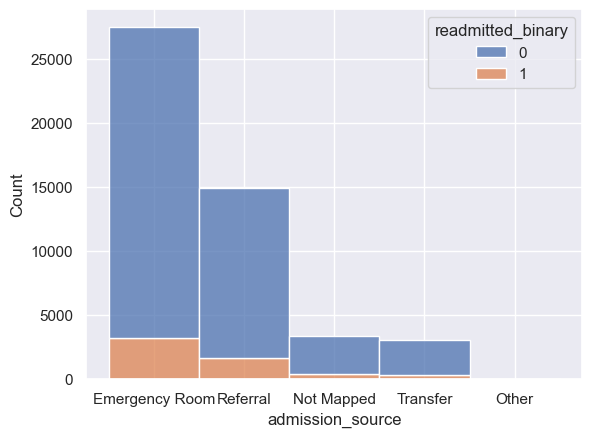

In [ ]:
sns.histplot(data = X_train, x = 'admission_source', hue = y_train, multiple = "stack")

**length_of_stay_in_hospital**: Apply the logarithm transformation to make the distribution more normal.

<Axes: xlabel='length_of_stay_in_hospital', ylabel='Count'>

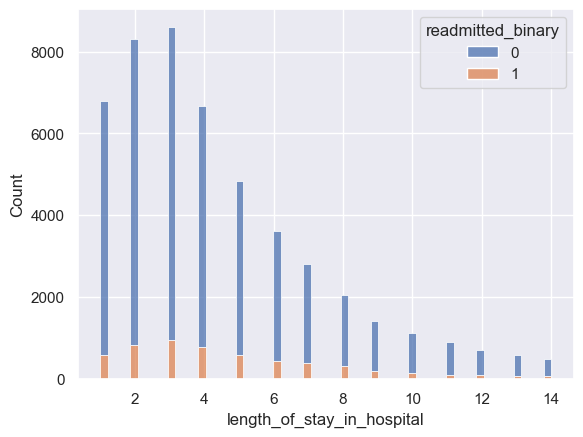

In [ ]:
sns.histplot(data = X_train, x = 'length_of_stay_in_hospital', hue = y_train, multiple = "stack")

<Axes: xlabel='length_of_stay_in_hospital', ylabel='Count'>

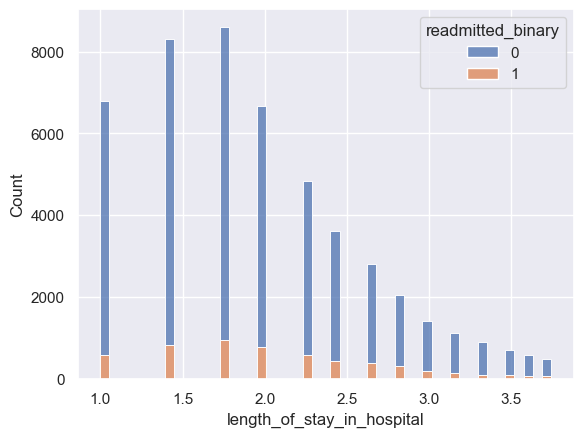

In [ ]:
sns.histplot(data = X_train, x = np.sqrt(X_train['length_of_stay_in_hospital']), hue = y_train, multiple = "stack")

<Axes: xlabel='length_of_stay_in_hospital', ylabel='Count'>

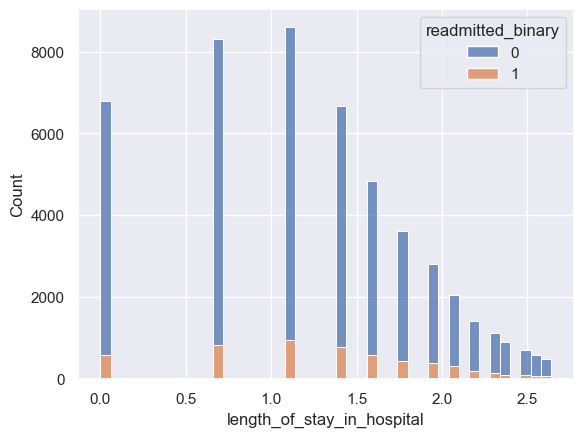

In [ ]:
sns.histplot(data = X_train, x = np.log(X_train['length_of_stay_in_hospital']), hue = y_train, multiple = "stack")

In [ ]:
X_train['length_of_stay_in_hospital'] = np.log(X_train['length_of_stay_in_hospital'])

In [ ]:
X_val['length_of_stay_in_hospital'] = np.log(X_val['length_of_stay_in_hospital'])

**number_of_medications**: Apply the square root transformation to make the distribution more normal.
This transformation helps in normalizing the distribution, mitigating the impact of extreme values and achieve a more symmetric distribution.

<Axes: xlabel='number_of_medications', ylabel='Count'>

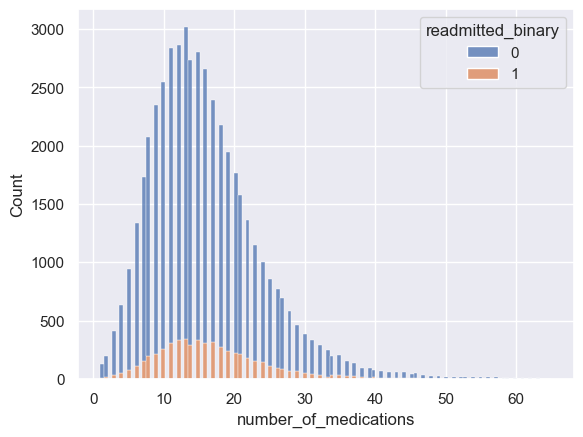

In [ ]:
sns.histplot(data = X_train, x = 'number_of_medications', hue = y_train, multiple = "stack")

<Axes: xlabel='number_of_medications', ylabel='Count'>

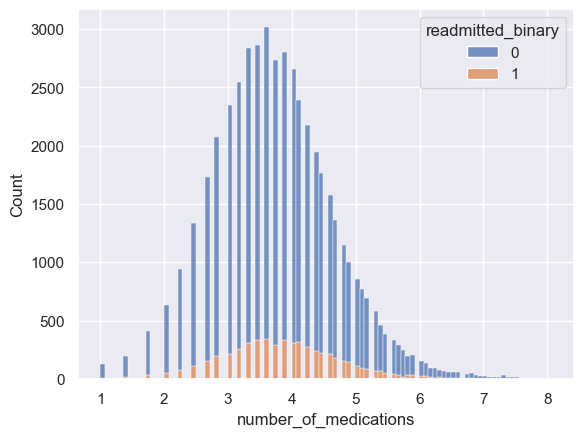

In [ ]:
sns.histplot(data = X_train, x = np.sqrt(X_train['number_of_medications']), hue = y_train, multiple = "stack")

<Axes: xlabel='number_of_medications', ylabel='Count'>

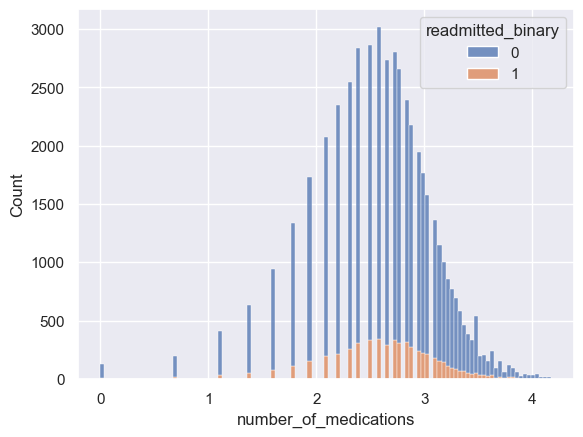

In [ ]:
sns.histplot(data = X_train, x = np.log(X_train['number_of_medications']), hue = y_train, multiple = "stack")

In [ ]:
X_train['number_of_medications'] = np.sqrt(X_train['number_of_medications'])

In [ ]:
X_val['number_of_medications'] = np.sqrt(X_val['number_of_medications'])

**Convert Variables to Dummy**

In [ ]:
# Convert the target variable to dummy
X_train['Female'].replace({'No': 0,'Ch': 1}, inplace = True)
X_train['Female'].value_counts()

Female
1    26336
0    22554
Name: count, dtype: int64

In [ ]:
# Convert the target variable to dummy
X_val['Female'].replace({'No': 0,'Ch': 1}, inplace = True)
X_val['Female'].value_counts()

Female
1    11243
0     9786
Name: count, dtype: int64

In [ ]:
# Convert the target variable to dummy
X_train['change_in_meds_during_hospitalization'].replace({'No': 0,'Ch': 1}, inplace = True)
X_train['change_in_meds_during_hospitalization'].value_counts()

change_in_meds_during_hospitalization
0    26241
1    22649
Name: count, dtype: int64

In [ ]:
# Convert the target variable to dummy
X_val['change_in_meds_during_hospitalization'].replace({'No': 0,'Ch': 1}, inplace = True)
X_val['change_in_meds_during_hospitalization'].value_counts()

change_in_meds_during_hospitalization
0    11254
1     9775
Name: count, dtype: int64

In [ ]:
# Convert the target variable to dummy
X_train['prescribed_diabetes_meds'].replace({'No': 0,'Yes': 1}, inplace = True)
X_train['prescribed_diabetes_meds'].value_counts()

prescribed_diabetes_meds
1    37748
0    11142
Name: count, dtype: int64

In [ ]:
# Convert the target variable to dummy
X_val['prescribed_diabetes_meds'].replace({'No': 0,'Yes': 1}, inplace = True)
X_val['prescribed_diabetes_meds'].value_counts()

prescribed_diabetes_meds
1    16241
0     4788
Name: count, dtype: int64

In [ ]:
X_train.columns

Index(['country', 'race', 'age', 'payer_code',
       'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication', 'total_encounters', 'total_visits_in_previous_year',
       'primary_diagnoses_categories', 'secondary_diagnoses_categories',
       'additional_diagnoses_categories', 'type2', 'diagnosed_diabetes',
       'Female', 'admitted_urgent/emergency'],
      dtype='object')

In [ ]:
X_train.head()

,country,race,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,average_pulse_bpm,...,medication,total_encounters,total_visits_in_previous_year,primary_diagnoses_categories,secondary_diagnoses_categories,additional_diagnoses_categories,type2,diagnosed_diabetes,Female,admitted_urgent/emergency
encounter_id,,,,,,,,,,,,,,,,,,,,,
985437,USA,Caucasian,75,MC,1,0,0,Emergency,InternalMedicine,62,...,No Medication,2,1,"Symptoms, Signs, and Ill-Defined Conditions",Infectious and Parasitic Diseases,"Endocrine, Nutritional, and Metabolic Diseases...",0.0,0.0,1,1.0
596531,USA,AfricanAmerican,65,MC,0,0,0,Urgent,InternalMedicine,86,...,['insulin'],1,0,Mental Disorders,Diseases of the Circulatory System,Diseases of the Skin and Subcutaneous Tissue,0.0,0.0,1,1.0
265974,USA,Caucasian,65,No Insurance,0,0,0,Emergency,Cardiology,101,...,"['pioglitazone', 'insulin']",1,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diseases of the Respiratory System,0.0,0.0,1,1.0
395716,USA,Caucasian,75,No Insurance,0,0,1,Urgent,InternalMedicine,85,...,['glipizide'],1,1,Diseases of the Respiratory System,Diseases of the Blood and Blood-Forming Organs,Injury and Poisoning,0.0,0.0,0,1.0
648737,USA,Caucasian,65,Other,0,0,0,Emergency,InternalMedicine,83,...,"['glyburide', 'rosiglitazone', 'insulin']",1,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diseases of the Circulatory System,0.0,0.0,0,1.0


In [ ]:
X_train.columns

Index(['country', 'race', 'age', 'payer_code',
       'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication', 'total_encounters', 'total_visits_in_previous_year',
       'primary_diagnoses_categories', 'secondary_diagnoses_categories',
       'additional_diagnoses_categories', 'type2', 'diagnosed_diabetes',
       'Female', 'admitted_urgent/emergency'],
      dtype='object')

In [ ]:
metric_features = metric_features + ['total_visits_in_previous_year','age', 'total_encounters']

In [ ]:
metric_features

['outpatient_visits_in_previous_year',
 'emergency_visits_in_previous_year',
 'inpatient_visits_in_previous_year',
 'average_pulse_bpm',
 'length_of_stay_in_hospital',
 'number_lab_tests',
 'non_lab_procedures',
 'number_of_medications',
 'number_diagnoses',
 'total_visits_in_previous_year',
 'age',
 'total_encounters']

In [ ]:
for column in X_train.columns:
    if X_train[column].nunique() == 2:
        print(f"Variable '{column}' has just 2 categories.")

Variable 'change_in_meds_during_hospitalization' has just 2 categories.
Variable 'prescribed_diabetes_meds' has just 2 categories.
Variable 'type2' has just 2 categories.
Variable 'diagnosed_diabetes' has just 2 categories.
Variable 'Female' has just 2 categories.
Variable 'admitted_urgent/emergency' has just 2 categories.


In [ ]:
non_metric_features = non_metric_features + ['primary_diagnoses_categories', 'secondary_diagnoses_categories',
       'additional_diagnoses_categories', 'type2', 'diagnosed_diabetes',
       'Female', 'admitted_urgent/emergency']

binary = ['Female', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'type2',  'diagnosed_diabetes',
          'admitted_urgent/emergency']

In [ ]:
non_metric_features.remove("age")

In [ ]:
non_metric_features_wout_binary = [feature for feature in non_metric_features if feature not in binary]

In [ ]:
all_features_wout_binary = non_metric_features_wout_binary + metric_features

# Scale dataset

In [ ]:
X_train_unscalled = X_train.copy()

In [ ]:
# Target encoding for Train and Validation
# We fit to train and transform for train and validation
encoder = ce.TargetEncoder()

for column in non_metric_features_wout_binary:
    encoder.fit(X_train[[column]], y_train)

    X_train[column] = encoder.transform(X_train[[column]])
    X_val[column] = encoder.transform(X_val[[column]])

In [ ]:
scaler = MinMaxScaler()

for column in all_features_wout_binary:
    scaler.fit(X_train[[column]])

    X_train[column] = scaler.transform(X_train[[column]])
    X_val[column] = scaler.transform(X_val[[column]])

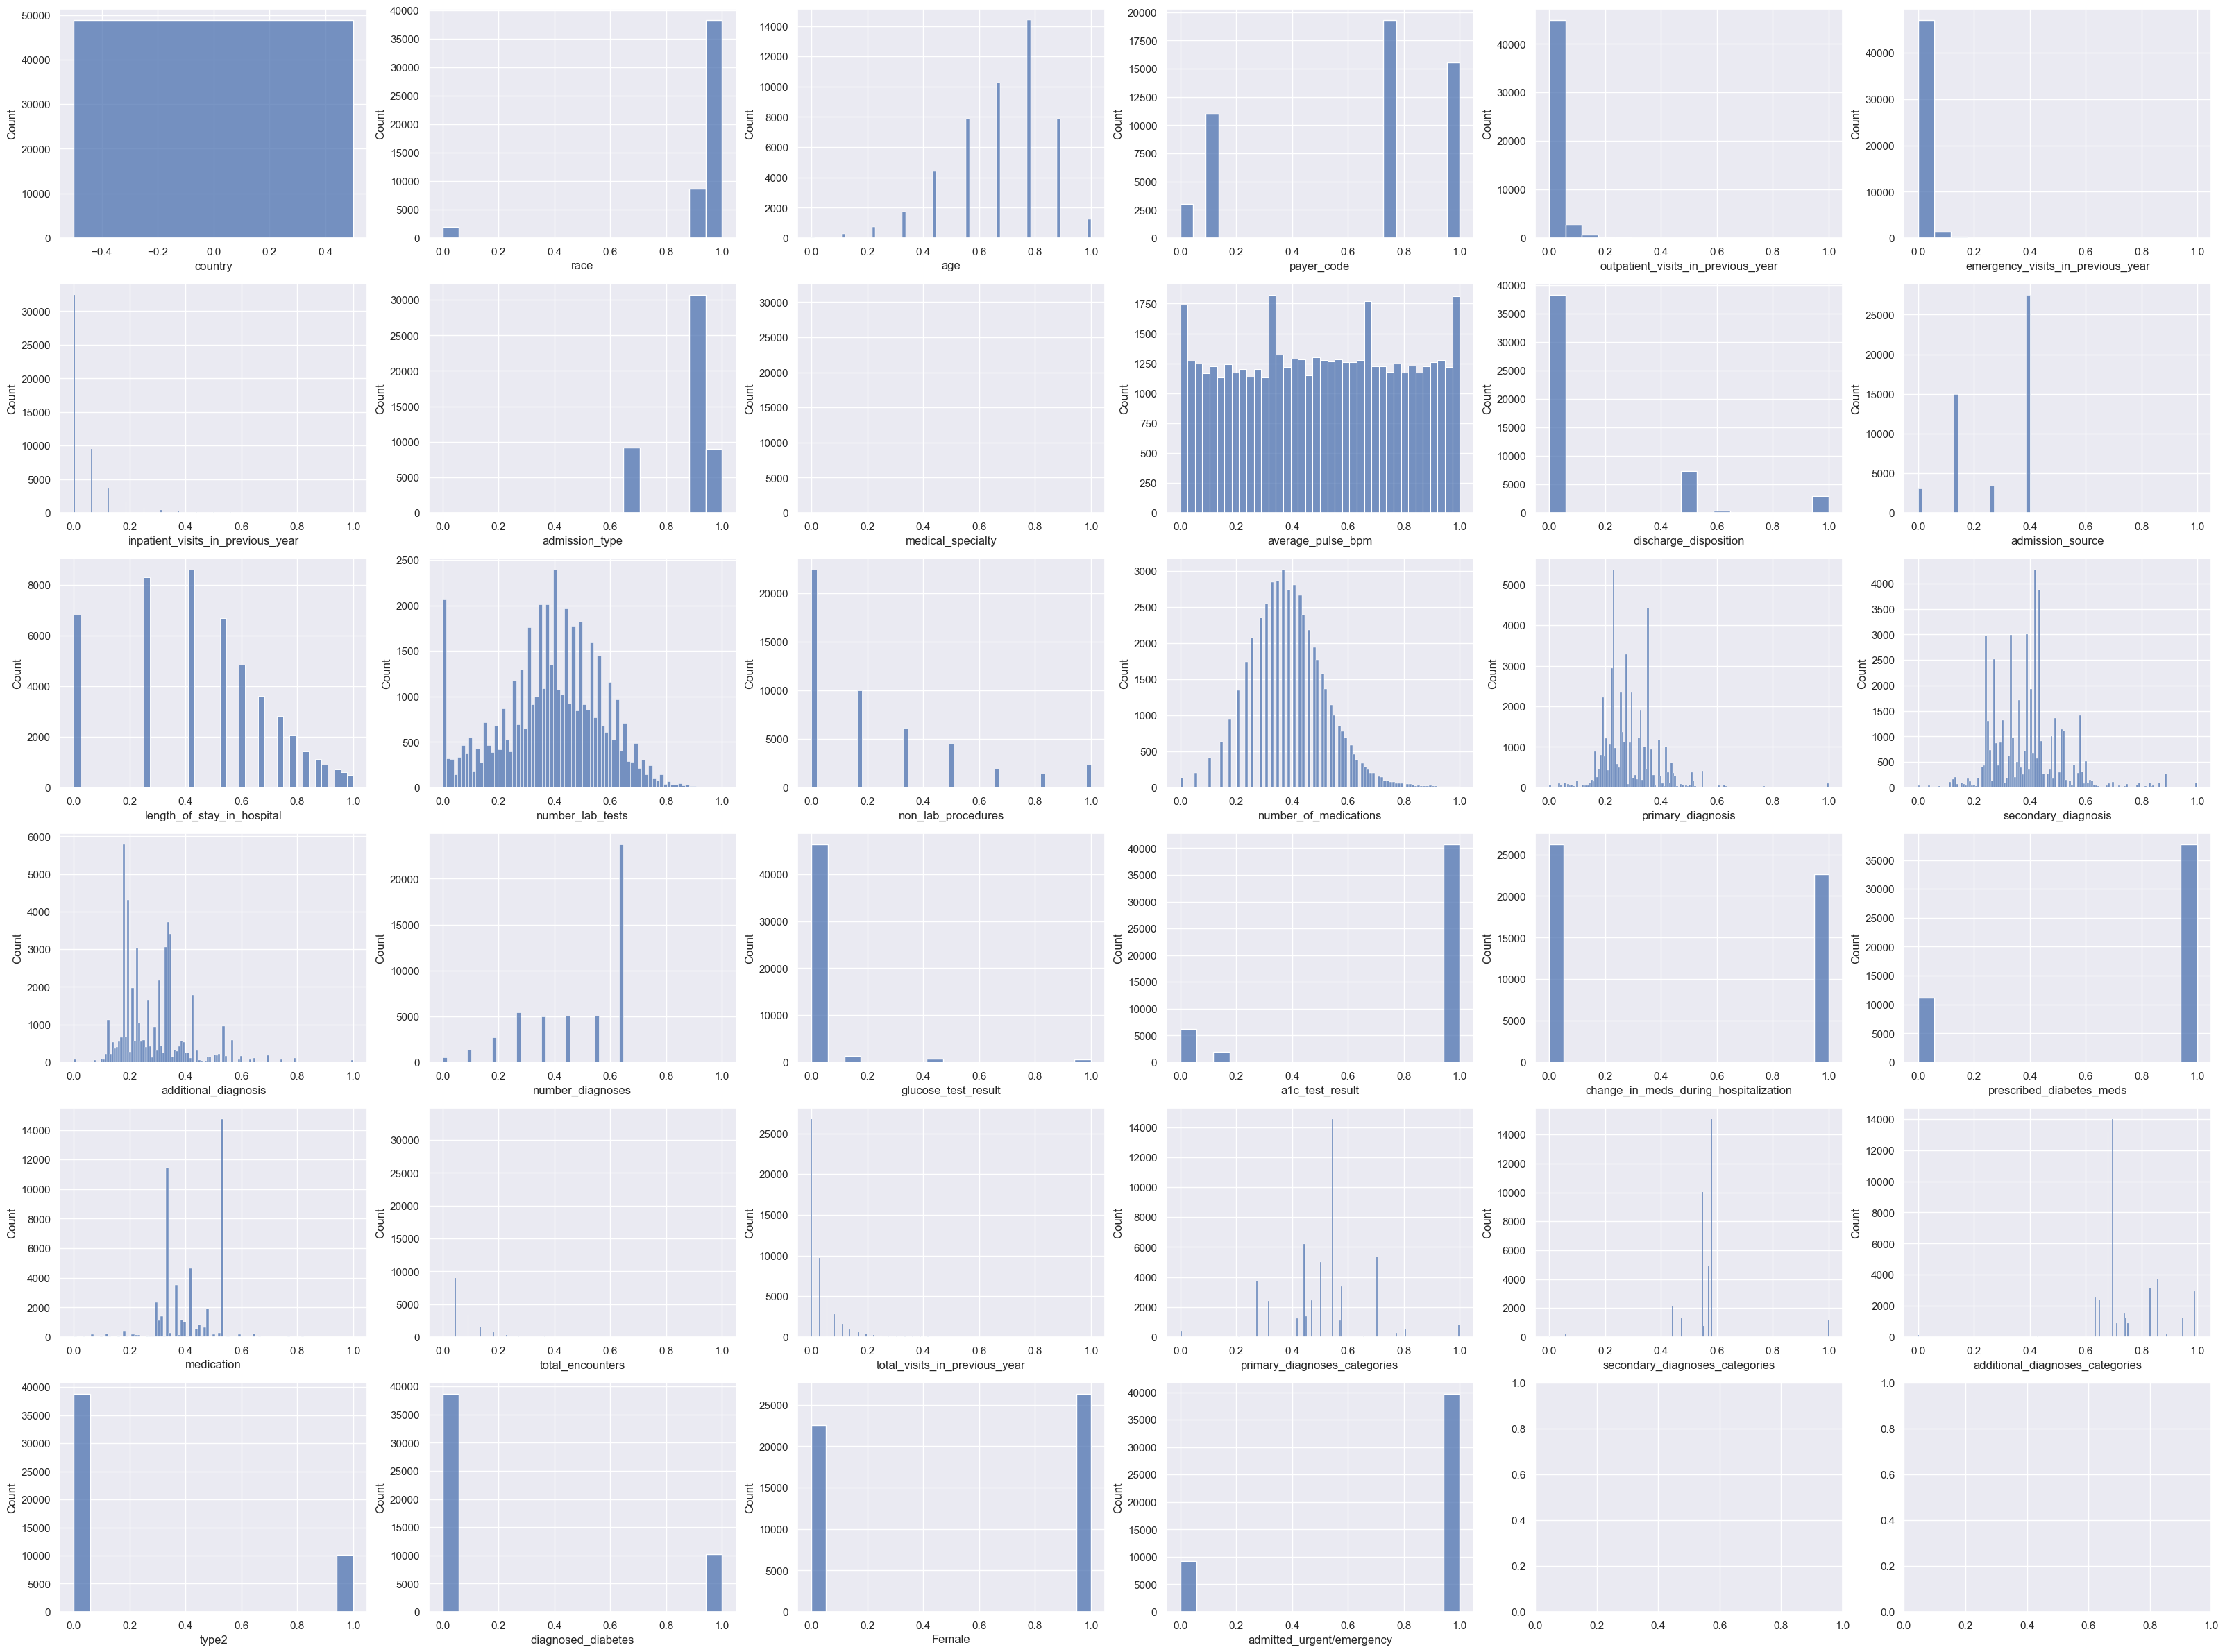

In [ ]:
# Check the Distribution of the Features AFTER SCALLING
sns.set()
fig, axes = plt.subplots(6, ceil(len(X_train.columns) / 6), figsize=(40, 30))

for ax, feat in zip(axes.flatten(), X_train.columns):
    sns.histplot(x = X_train[feat], ax = ax)

plt.show()

# Balance dataset

In [ ]:
#using smote ENN
'''from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(sampling_strategy='auto')  # Adjust the sampling_strategy as needed

# Fit and transform the training data using SMOTE-ENN
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)'''

"from imblearn.combine import SMOTEENN\n\nsmote_enn = SMOTEENN(sampling_strategy='auto')  # Adjust the sampling_strategy as needed\n\n# Fit and transform the training data using SMOTE-ENN\nX_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)"

In [ ]:
#using Smote TOMEK
from imblearn.combine import SMOTETomek

sme = SMOTETomek(random_state=42)
X_resampled, y_resampled = sme.fit_resample(X_train, y_train)

# **Feature Selection**

In [ ]:
X_train_selection = X_resampled.copy()

In [ ]:
X_val_selection = X_val.copy()

**Features' Variance**

In [ ]:
# Univariate variables: Check the variance of each feature identify those with no variability.
# Features with no variance (i.e., constant values) should be removed.
variance_values = X_train_selection.var().round(10)*100
print(variance_values)

country                                   0.000000
race                                      3.249193
age                                       2.670709
payer_code                               12.664530
outpatient_visits_in_previous_year        0.141656
emergency_visits_in_previous_year         0.089938
inpatient_visits_in_previous_year         0.769952
admission_type                            1.306234
medical_specialty                         0.341136
average_pulse_bpm                         7.945720
discharge_disposition                     9.235239
admission_source                          1.744586
length_of_stay_in_hospital                6.522504
number_lab_tests                          2.904462
non_lab_procedures                        7.307293
number_of_medications                     1.660531
primary_diagnosis                         0.870091
secondary_diagnosis                       1.419548
additional_diagnosis                      1.322956
number_diagnoses               

In [ ]:
for threshold in [0.1]:
    low_variance_features = variance_values[variance_values < threshold].index
    print(f"Threshold: {threshold}, Low-variance features: {low_variance_features}")

Threshold: 0.1, Low-variance features: Index(['country', 'emergency_visits_in_previous_year'], dtype='object')


In [ ]:
variance_eliminate = ['emergency_visits_in_previous_year', 'country']

In [ ]:
# Drop the column country because it has only one value, so it won´t give use any valuable insights
X_train_selection.drop("country", axis = 1, inplace= True)
X_val_selection.drop("country", axis = 1, inplace= True)

X_train.drop("country", axis = 1, inplace= True)
X_val.drop("country", axis = 1, inplace= True)

non_metric_features.remove('country')

**Correlation Matrices**

In [ ]:
X_train_selection[metric_features].columns

Index(['outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'average_pulse_bpm',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses',
       'total_visits_in_previous_year', 'age', 'total_encounters'],
      dtype='object')

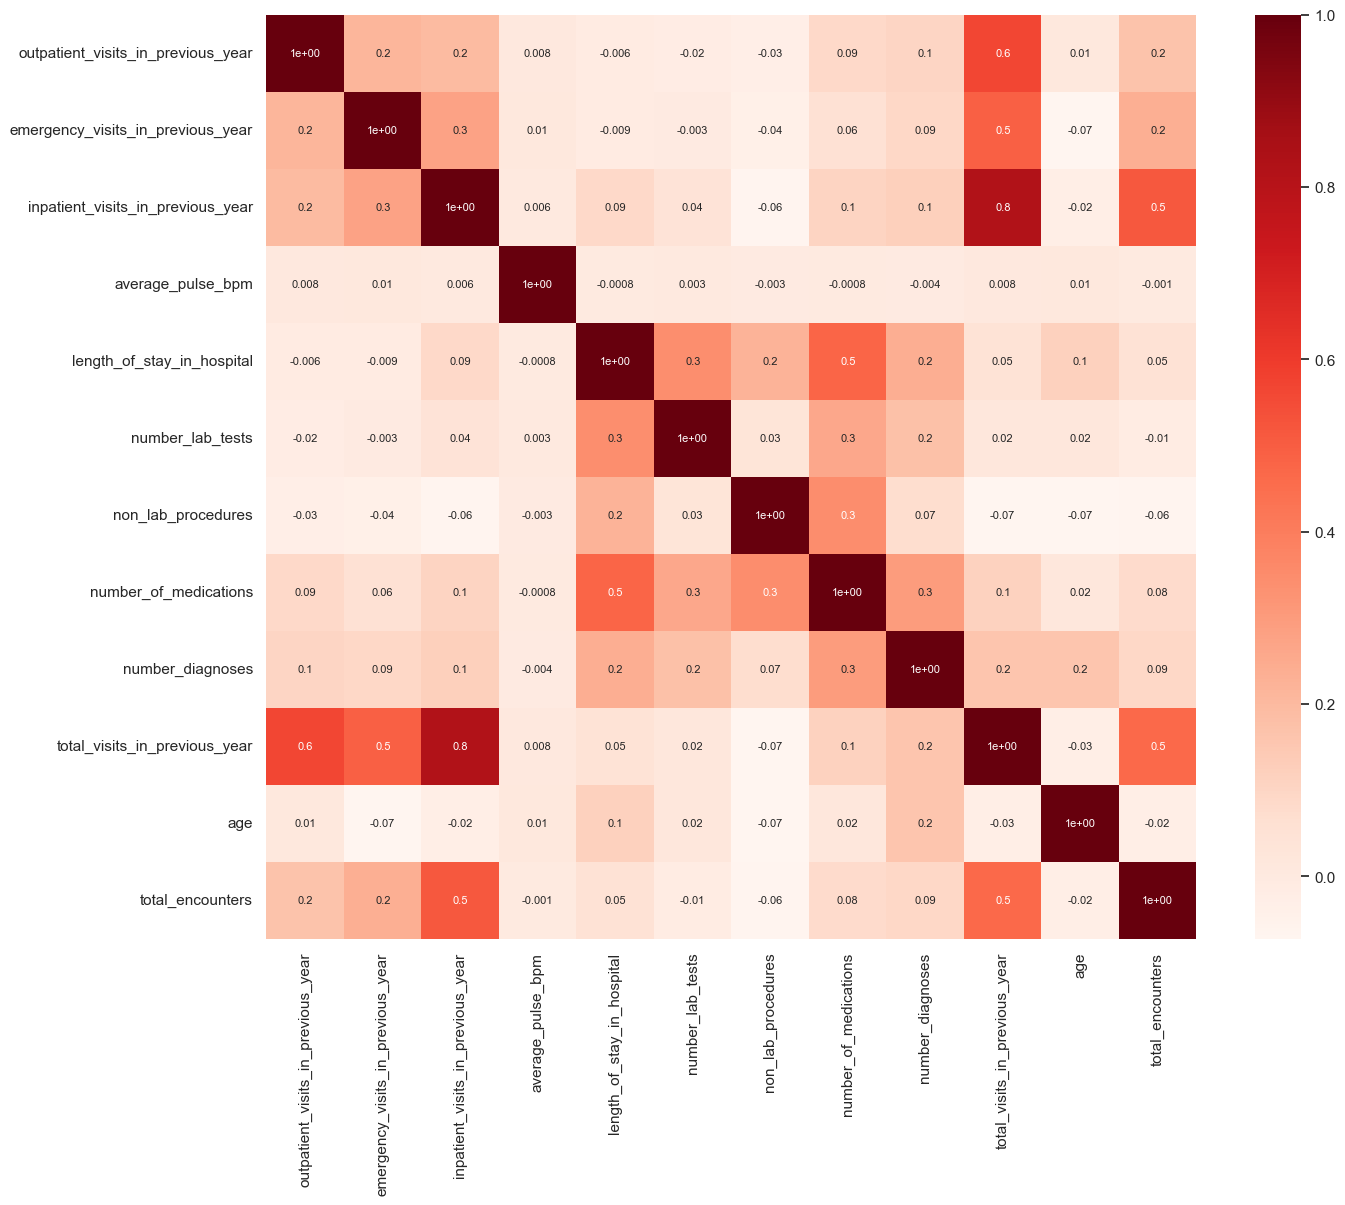

In [ ]:
# Correlation Indices
def cor_heatmap(cor):
    plt.figure(figsize=(15,12))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1', annot_kws = {"size": 8})
    plt.show()

# Check Spearman Correlation
cor_spearman = X_train_selection[metric_features].corr(method ='spearman')

cor_heatmap(cor_spearman)

In [ ]:
spearman_eliminate = ['total_visits_in_previous_year']

**Chi-Square** for Categorical Features

In [ ]:
# Chi-Square para categorical features

chi_square_eliminate = []

def TestIndependence(X,y,var,alpha=0.05):
    dfObserved = pd.crosstab(y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
        chi_square_eliminate.append(var)
    print(result)


for var in non_metric_features:
    TestIndependence(X_train_selection[var], y_resampled, var)

race is IMPORTANT for Prediction
payer_code is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
medical_specialty is IMPORTANT for Prediction
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
primary_diagnosis is IMPORTANT for Prediction
secondary_diagnosis is IMPORTANT for Prediction
additional_diagnosis is IMPORTANT for Prediction
glucose_test_result is IMPORTANT for Prediction
a1c_test_result is IMPORTANT for Prediction
change_in_meds_during_hospitalization is IMPORTANT for Prediction
prescribed_diabetes_meds is IMPORTANT for Prediction
medication is IMPORTANT for Prediction
primary_diagnoses_categories is IMPORTANT for Prediction
secondary_diagnoses_categories is IMPORTANT for Prediction
additional_diagnoses_categories is IMPORTANT for Prediction
type2 is IMPORTANT for Prediction
diagnosed_diabetes is NOT an important predictor. (Discard diagnosed_diabetes from model)
Female is IMPORTANT for Prediction
admitted_urgent/

In [ ]:
chi_square_eliminate

['diagnosed_diabetes']

**RFE (Recursive Feature Elimination)**

In [ ]:
# Nr of features
nof_list=np.arange(2, 13)
high_score = 0

# Variable to store the optimum features
nof = 0
train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()

    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])

    X_train_rfe = rfe.fit_transform(X_train_selection, y_resampled)
    X_val_rfe = rfe.transform(X_val)

    model.fit(X_train_rfe, y_resampled)

    # storing results on training data
    train_pred = model.predict(X_train_rfe)
    train_score = f1_score(y_resampled, train_pred)
    train_score_list.append(train_score)

    # storing results on validation data
    val_pred = model.predict(X_val_rfe)
    val_score = f1_score(y_val, val_pred)
    val_score_list.append(val_score)

    # check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.272934


In [ ]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 10)

X_rfe = rfe.fit_transform(X_train_selection, y_resampled)

In [ ]:
# Evaluate what columns should we keep based on RFE
pd.Series(rfe.support_, index = X_train_selection.columns)

race                                     False
age                                       True
payer_code                               False
outpatient_visits_in_previous_year        True
emergency_visits_in_previous_year        False
inpatient_visits_in_previous_year         True
admission_type                           False
medical_specialty                        False
average_pulse_bpm                        False
discharge_disposition                     True
admission_source                         False
length_of_stay_in_hospital               False
number_lab_tests                         False
non_lab_procedures                       False
number_of_medications                    False
primary_diagnosis                         True
secondary_diagnosis                       True
additional_diagnosis                      True
number_diagnoses                         False
glucose_test_result                      False
a1c_test_result                          False
change_in_med

In [ ]:
rfe_eliminate = []

rfe_dataset = pd.Series(rfe.support_, index = X_train_selection.columns)

for index, value in rfe_dataset.items():
    if not value:
        rfe_eliminate.append(index)

In [ ]:
rfe_eliminate

['race',
 'payer_code',
 'emergency_visits_in_previous_year',
 'admission_type',
 'medical_specialty',
 'average_pulse_bpm',
 'admission_source',
 'length_of_stay_in_hospital',
 'number_lab_tests',
 'non_lab_procedures',
 'number_of_medications',
 'number_diagnoses',
 'glucose_test_result',
 'a1c_test_result',
 'change_in_meds_during_hospitalization',
 'prescribed_diabetes_meds',
 'total_visits_in_previous_year',
 'primary_diagnoses_categories',
 'secondary_diagnoses_categories',
 'type2',
 'diagnosed_diabetes',
 'Female',
 'admitted_urgent/emergency']

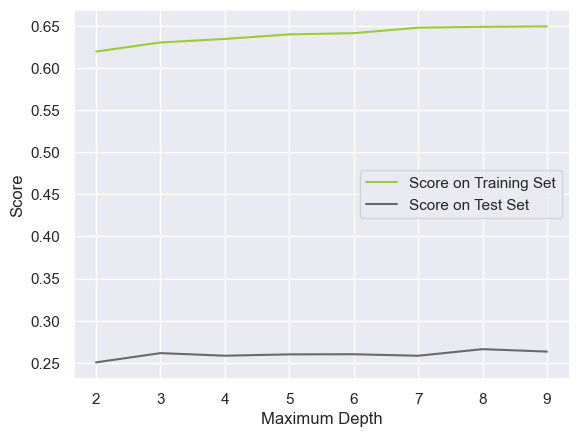

In [ ]:
plt.plot(list(range(2, 10)), train_score_list[:8], label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(2, 10)), val_score_list[:8], label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

**LASSO**

In [ ]:
# Lasso
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
reg = LassoCV()
reg.fit(X_train_selection, y_resampled)

coef = pd.Series(reg.coef_, index = X_train_selection.columns).round(6)
coef

race                                     0.050174
age                                      0.161290
payer_code                               0.035545
outpatient_visits_in_previous_year      -0.243997
emergency_visits_in_previous_year       -0.000000
inpatient_visits_in_previous_year        0.140431
admission_type                          -0.113552
medical_specialty                        0.155284
average_pulse_bpm                       -0.012903
discharge_disposition                    0.118043
admission_source                         0.043787
length_of_stay_in_hospital              -0.015556
number_lab_tests                         0.053118
non_lab_procedures                      -0.009634
number_of_medications                    0.089411
primary_diagnosis                        0.666419
secondary_diagnosis                      0.351753
additional_diagnosis                     0.390862
number_diagnoses                         0.046009
glucose_test_result                     -0.018768


In [ ]:
selected_variables = (coef >= -0.15) & (coef <= 0.15)

lasso_eliminate = coef.index[selected_variables].tolist()

print("Variables to eliminate with Lasso:", lasso_eliminate)

Variables to eliminate with Lasso: ['race', 'payer_code', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year', 'admission_type', 'average_pulse_bpm', 'discharge_disposition', 'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'glucose_test_result', 'a1c_test_result', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'total_visits_in_previous_year', 'primary_diagnoses_categories', 'secondary_diagnoses_categories', 'type2', 'diagnosed_diabetes', 'Female', 'admitted_urgent/emergency']


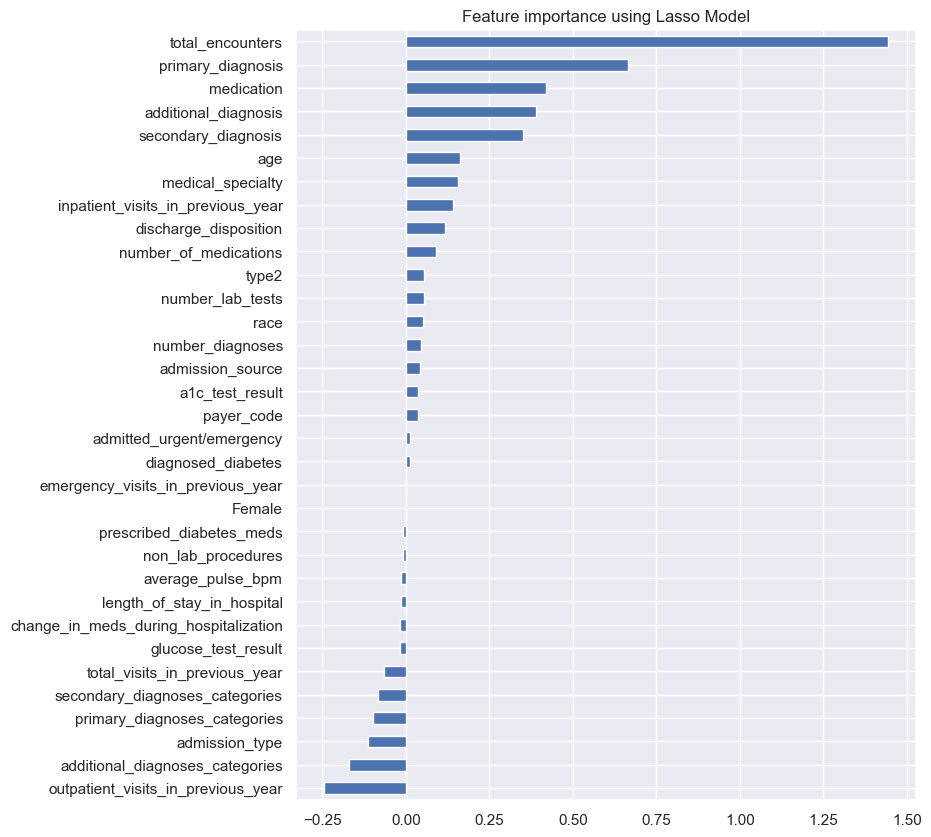

In [ ]:
plot_importance(coef,'Lasso')

Decision tree

race: 0.005
age: 0.071
payer_code: 0.013
outpatient_visits_in_previous_year: 0.005
emergency_visits_in_previous_year: 0.008
inpatient_visits_in_previous_year: 0.15
admission_type: 0.004
medical_specialty: 0.012
average_pulse_bpm: 0.025
discharge_disposition: 0.01
admission_source: 0.006
length_of_stay_in_hospital: 0.015
number_lab_tests: 0.023
non_lab_procedures: 0.016
number_of_medications: 0.019
primary_diagnosis: 0.028
secondary_diagnosis: 0.021
additional_diagnosis: 0.022
number_diagnoses: 0.012
glucose_test_result: 0.003
a1c_test_result: 0.005
change_in_meds_during_hospitalization: 0.003
prescribed_diabetes_meds: 0.002
medication: 0.016
total_encounters: 0.437
total_visits_in_previous_year: 0.012
primary_diagnoses_categories: 0.014
secondary_diagnoses_categories: 0.015
additional_diagnoses_categories: 0.024
type2: 0.002
diagnosed_diabetes: 0.001
Female: 0.004
admitted_urgent/emergency: 0.001


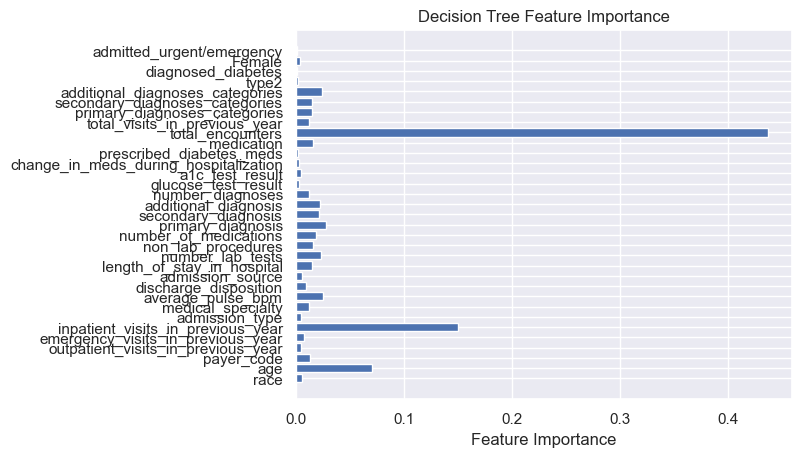

In [ ]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state = 42)

clf.fit(X_train_selection, y_resampled)

feature_importances = clf.feature_importances_

decision_tree_eliminate = []

for feature, importance in zip(X_train_selection.columns, feature_importances):
    print(f"{feature}: {importance.round(3)}")
    if importance < 0.015:
      decision_tree_eliminate.append(feature)


# Plot feature importances
plt.barh(X_train_selection.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

In [ ]:
decision_tree_eliminate

['race',
 'payer_code',
 'outpatient_visits_in_previous_year',
 'emergency_visits_in_previous_year',
 'admission_type',
 'medical_specialty',
 'discharge_disposition',
 'admission_source',
 'number_diagnoses',
 'glucose_test_result',
 'a1c_test_result',
 'change_in_meds_during_hospitalization',
 'prescribed_diabetes_meds',
 'total_visits_in_previous_year',
 'primary_diagnoses_categories',
 'secondary_diagnoses_categories',
 'type2',
 'diagnosed_diabetes',
 'Female',
 'admitted_urgent/emergency']

In [ ]:
from collections import Counter

# Combine all the lists into one list
all_eliminate = (
    variance_eliminate
    + spearman_eliminate
    + chi_square_eliminate
    + rfe_eliminate
    + lasso_eliminate
    + decision_tree_eliminate
)

element_counts = Counter(all_eliminate)

# Specify the minimum number of lists an element should appear in
min_appearances = 3

common_elements = [element for element, count in element_counts.items() if count >= min_appearances]

print(common_elements)

['emergency_visits_in_previous_year', 'total_visits_in_previous_year', 'diagnosed_diabetes', 'race', 'payer_code', 'admission_type', 'admission_source', 'number_diagnoses', 'glucose_test_result', 'a1c_test_result', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'primary_diagnoses_categories', 'secondary_diagnoses_categories', 'type2', 'Female', 'admitted_urgent/emergency']


In [ ]:
X_train_selection.drop(columns=common_elements, inplace=True)
X_val_selection.drop(columns=common_elements, inplace=True)

In [ ]:
X_train.drop(columns=common_elements, inplace=True)
X_val.drop(columns=common_elements, inplace=True)

# **Predictive Modelling**

In [ ]:
# Confusion Matrix and Model Assessment Metrics
def metrics(y_train, pred_train, y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                TRAIN                                                      ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))

    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

### **Logistic Regression**

In [ ]:
'''param_grid={
        'class_weight': ['balanced'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear', 'sag', 'saga'],
        'penalty': ['l1', 'l2'],
    }

logreg = LogisticRegression()

random_search = RandomizedSearchCV(logreg, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, verbose=0)

# Fit the model to the data
result = random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = result.best_params_
best_model = result.best_estimator_

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Best estimator: {best_model}")

#output: (C=0.004832930238571752, class_weight='balanced', penalty='l1', solver='saga')'''

'param_grid={\n        \'class_weight\': [\'balanced\'],\n        \'C\': np.logspace(-4, 4, 20),\n        \'solver\': [\'liblinear\', \'sag\', \'saga\'],\n        \'penalty\': [\'l1\', \'l2\'],\n    }\n\nlogreg = LogisticRegression()\n\nrandom_search = RandomizedSearchCV(logreg, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, verbose=0)\n\n# Fit the model to the data\nresult = random_search.fit(X_train, y_train)\n\n# Get the best parameters and model\nbest_params = result.best_params_\nbest_model = result.best_estimator_\n\n# Print the results\nprint(f"Best Parameters: {best_params}")\nprint(f"Best estimator: {best_model}")\n\n#output: (C=0.004832930238571752, class_weight=\'balanced\', penalty=\'l1\', solver=\'saga\')'

In [ ]:
lr_model = LogisticRegression(C=0.004832930238571752, class_weight='balanced', penalty='l1', solver='saga').fit(X_train, y_train)

log_pred_train_rs = lr_model.predict(X_train)
log_pred_val_rs = lr_model.predict(X_val)

metrics(y_train, log_pred_train_rs, y_val, log_pred_val_rs)
print('f1_train:',f1_score(y_train, log_pred_train_rs).round(2))
print('f1_val:',f1_score(y_val, log_pred_val_rs).round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.71      0.81     43339
           1       0.21      0.58      0.30      5551

    accuracy                           0.70     48890
   macro avg       0.57      0.65      0.55     48890
weighted avg       0.85      0.70      0.75     48890

[[30774 12565]
 [ 2306  3245]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### **Naive Bayes**

In [ ]:
'''# Create a Naive Bayes model
model = ComplementNB()

# Define hyperparameters and their potential values
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
}

# Create GridSearchCV object
gsc = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)

# Fit the GridSearchCV object to the data
grid_result = gsc.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: %s" % grid_result.best_params_)'''

'# Create a Naive Bayes model\nmodel = ComplementNB()\n\n# Define hyperparameters and their potential values\nparam_grid = {\n    \'alpha\': [0.1, 0.5, 1.0, 1.5, 2.0], \n}\n\n# Create GridSearchCV object\ngsc = GridSearchCV(estimator=model, param_grid=param_grid, scoring=\'f1\', cv=5)\n\n# Fit the GridSearchCV object to the data\ngrid_result = gsc.fit(X_train, y_train)\n\n# Print the best parameters\nprint("Best parameters: %s" % grid_result.best_params_)'

In [ ]:
modelCNB = ComplementNB(alpha=0.1)

modelCNB.fit(X_train, y_train)

NB_pred_train = modelCNB.predict(X_train)
NB_pred_val = modelCNB.predict(X_val)

metrics(y_train, NB_pred_train, y_val, NB_pred_val)
print('f1_train:',f1_score(y_train, NB_pred_train).round(2))
print('f1_val:',f1_score(y_val, NB_pred_val).round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.71      0.80     43339
           1       0.19      0.52      0.28      5551

    accuracy                           0.69     48890
   macro avg       0.56      0.62      0.54     48890
weighted avg       0.84      0.69      0.74     48890

[[30880 12459]
 [ 2642  2909]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### **KNN**

In [ ]:
'''knn_parameters = {
    'n_neighbors' : range(1,26,2),
    'weights' : ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'metric' : ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': range(1,50,5)
}

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(knn, param_distributions=knn_parameters, n_iter=10, cv=5, random_state=42, verbose=2)

# Fit the model to the data
resultknn = random_search.fit(X_train_selection, y_resampled)

# Get the best parameters and model
best_params_knn = resultknn.best_params_
best_model_knn = resultknn.best_estimator_

# Print the results
print(f"Best Parameters: {best_params_knn}")
print(f"Best estimator: {best_model_knn}")

#output: Best estimator: KNeighborsClassifier(algorithm='kd_tree', leaf_size=41, metric='manhattan', n_neighbors=3)'''

'knn_parameters = {\n    \'n_neighbors\' : range(1,26,2),\n    \'weights\' : [\'uniform\', \'distance\'],\n    \'algorithm\': [\'auto\', \'ball_tree\', \'kd_tree\', \'brute\'],\n    \'p\': [1, 2],\n    \'metric\' : [\'euclidean\', \'manhattan\', \'minkowski\'],\n    \'leaf_size\': range(1,50,5)\n}\n\nknn = KNeighborsClassifier()\n\nrandom_search = RandomizedSearchCV(knn, param_distributions=knn_parameters, n_iter=10, cv=5, random_state=42, verbose=2)\n\n# Fit the model to the data\nresultknn = random_search.fit(X_train_selection, y_resampled)\n\n# Get the best parameters and model\nbest_params_knn = resultknn.best_params_\nbest_model_knn = resultknn.best_estimator_\n\n# Print the results\nprint(f"Best Parameters: {best_params_knn}")\nprint(f"Best estimator: {best_model_knn}")\n\n#output: Best estimator: KNeighborsClassifier(algorithm=\'kd_tree\', leaf_size=41, metric=\'manhattan\', n_neighbors=3)'

In [ ]:
modelKNN = KNeighborsClassifier(algorithm='kd_tree', leaf_size=41, metric='manhattan', n_neighbors=3)

modelKNN.fit(X_train_selection, y_resampled)

KNN_pred_train = modelKNN.predict(X_train_selection)
KNN_pred_val = modelKNN.predict(X_val_selection)

metrics(y_resampled, KNN_pred_train, y_val, KNN_pred_val)
print('f1_train:',f1_score(y_resampled, KNN_pred_train).round(2))
print('f1_val:',f1_score(y_val, KNN_pred_val).round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     43303
           1       0.91      0.99      0.95     43303

    accuracy                           0.95     86606
   macro avg       0.95      0.95      0.95     86606
weighted avg       0.95      0.95      0.95     86606

[[39068  4235]
 [  330 42973]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### **MLP**

In [ ]:
'''from sklearn.neural_network import MLPClassifier

mlp_param = {
    'hidden_layer_sizes': [(10,10), (15,15), (15, 10, 15)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['invscaling', 'adaptive'],
    'batch_size': [50, 100, 200]
}

mlp = MLPClassifier(verbose=True)

random_search_mlp = RandomizedSearchCV(mlp, param_distributions=mlp_param, n_iter=10, cv=5, random_state=42, verbose=2)

# Fit the model to the data
resultmlp = random_search_mlp.fit(X_train_selection, y_resampled)

# Get the best parameters and model
best_params_mlp = resultmlp.best_params_
best_model_mlp = resultmlp.best_estimator_

# Print the results
print(f"Best Parameters: {best_params_mlp}")
print(f"Best estimator: {best_model_mlp}")'''

'from sklearn.neural_network import MLPClassifier\n\nmlp_param = {\n    \'hidden_layer_sizes\': [(10,10), (15,15), (15, 10, 15)],\n    \'activation\': [\'tanh\', \'relu\', \'logistic\'],\n    \'solver\': [\'adam\', \'sgd\'],\n    \'learning_rate\': [\'invscaling\', \'adaptive\'],\n    \'batch_size\': [50, 100, 200]\n}\n\nmlp = MLPClassifier(verbose=True) \n\nrandom_search_mlp = RandomizedSearchCV(mlp, param_distributions=mlp_param, n_iter=10, cv=5, random_state=42, verbose=2)\n\n# Fit the model to the data\nresultmlp = random_search_mlp.fit(X_train_selection, y_resampled)\n\n# Get the best parameters and model\nbest_params_mlp = resultmlp.best_params_\nbest_model_mlp = resultmlp.best_estimator_\n\n# Print the results\nprint(f"Best Parameters: {best_params_mlp}")\nprint(f"Best estimator: {best_model_mlp}")'

In [ ]:
MLPmodel = MLPClassifier(activation='tanh', batch_size=200, hidden_layer_sizes=(15, 15), learning_rate='adaptive')
MLPmodel.fit(X_train_selection, y_resampled)

MLP_pred_train = MLPmodel.predict(X_train_selection)
MLP_pred_val = MLPmodel.predict(X_val_selection)

metrics(y_resampled, MLP_pred_train, y_val, MLP_pred_val)
print('f1_train:',f1_score(y_resampled, MLP_pred_train).round(2))
print('f1_val:',f1_score(y_val, MLP_pred_val).round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.82      0.79     43303
           1       0.81      0.73      0.77     43303

    accuracy                           0.78     86606
   macro avg       0.78      0.78      0.78     86606
weighted avg       0.78      0.78      0.78     86606

[[35648  7655]
 [11521 31782]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### **Decition Trees**

In [ ]:
'''# ------- FIND THE BEST VALUE FOR MAX_DEPTH
# 'None': expand the nodes until all leaves are pure (unless other parameters are defined)
# High Depth: increase the number of slipts and captures more information about the data -> OVERFIT
# Small Depth: UNDERFIT

depth_range = range(1, 16)
avg_f1_train = []
avg_f1_val = []

# Perform StratifiedKFold cross-validation
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

for depth in depth_range:
    f1_scores_train = []
    f1_scores_val = []

    for train_index, val_index in skf.split(X_smote, y_smote):
        X_train, X_val = X_smote.iloc[train_index], X_smote.iloc[val_index]
        y_train, y_val = y_smote.iloc[train_index], y_smote.iloc[val_index]

        # Create a Decision Tree model with the current depth
        dt_model = DecisionTreeClassifier(max_depth = depth, random_state = 42)
        dt_model.fit(X_train, y_train)

        # Predictions on training set
        y_train_pred = dt_model.predict(X_train)
        f1_train = f1_score(y_train, y_train_pred, average = 'weighted')
        f1_scores_train.append(f1_train)

        # Predictions on validation set
        y_val_pred = dt_model.predict(X_val)
        f1_val = f1_score(y_val, y_val_pred, average = 'weighted')
        f1_scores_val.append(f1_val)

    avg_f1_train.append(np.mean(f1_scores_train))
    avg_f1_val.append(np.mean(f1_scores_val))

# Find the depth associated with the highest F1 score
best_depth_train = depth_range[np.argmax(avg_f1_train)]
best_depth_val = depth_range[np.argmax(avg_f1_val)]

# Plotting
plt.plot(depth_range, avg_f1_train, label='Train F1 Score', marker='o')
plt.plot(depth_range, avg_f1_val, label='Validation F1 Score', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Average F1 Score')
plt.title('Average F1 Score vs Tree Depth')
plt.legend()
plt.show()

# The best max_depth = 9/10'''

"# ------- FIND THE BEST VALUE FOR MAX_DEPTH\n# 'None': expand the nodes until all leaves are pure (unless other parameters are defined)\n# High Depth: increase the number of slipts and captures more information about the data -> OVERFIT\n# Small Depth: UNDERFIT\n\ndepth_range = range(1, 16)\navg_f1_train = []\navg_f1_val = []\n\n# Perform StratifiedKFold cross-validation\nskf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)\n\nfor depth in depth_range:\n    f1_scores_train = []\n    f1_scores_val = []\n\n    for train_index, val_index in skf.split(X_smote, y_smote):\n        X_train, X_val = X_smote.iloc[train_index], X_smote.iloc[val_index]\n        y_train, y_val = y_smote.iloc[train_index], y_smote.iloc[val_index]\n\n        # Create a Decision Tree model with the current depth\n        dt_model = DecisionTreeClassifier(max_depth = depth, random_state = 42)\n        dt_model.fit(X_train, y_train)\n\n        # Predictions on training set\n        y_train_pred = dt

In [ ]:
'''# ------- FEATURE IMPORTANCE OF GINI AND ENTROPY
gini_importance = DecisionTreeClassifier().fit(X_smote, y_smote).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_smote, y_smote).feature_importances_

import seaborn as sns
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_smote.columns
tidy = zippy.melt(id_vars='col').rename(columns = str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)'''

"# ------- FEATURE IMPORTANCE OF GINI AND ENTROPY\ngini_importance = DecisionTreeClassifier().fit(X_smote, y_smote).feature_importances_\nentropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_smote, y_smote).feature_importances_\n\nimport seaborn as sns\nzippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])\nzippy['col'] = X_smote.columns\ntidy = zippy.melt(id_vars='col').rename(columns = str.title)\ntidy.sort_values(['Value'], ascending = False, inplace = True)\n\nplt.figure(figsize=(15,8))\nsns.barplot(y='Col', x='Value', hue='Variable', data=tidy)"

In [ ]:
'''from sklearn.tree import DecisionTreeClassifier

param_grid_DT = {
    'splitter': ['best', 'random'],
    'max_depth': [9, 10],
    'min_samples_split': [100, 500, 1000],
    'min_samples_leaf': [100, 200, 500],
    'max_features': [None, 15, 0.5],
    'max_leaf_nodes': [None, 5, 10],
    'criterion': ['gini', 'entropy']
}

DT = DecisionTreeClassifier()

random_search_dt = RandomizedSearchCV(DT, param_distributions=param_grid_DT, n_iter=10, cv=5, random_state=42, verbose=0)

# Fit the model to the data
result_dt = random_search_dt.fit(X_train, y_train)

# Get the best parameters and model
best_params_dt = result_dt.best_params_
best_model_dt = result_dt.best_estimator_

# Print the results
print(f"Best Parameters: {best_params_dt}")
print(f"Best estimator: {best_model_dt}")'''

'from sklearn.tree import DecisionTreeClassifier\n\nparam_grid_DT = {\n    \'splitter\': [\'best\', \'random\'],\n    \'max_depth\': [9, 10],\n    \'min_samples_split\': [100, 500, 1000],\n    \'min_samples_leaf\': [100, 200, 500],\n    \'max_features\': [None, 15, 0.5],\n    \'max_leaf_nodes\': [None, 5, 10],\n    \'criterion\': [\'gini\', \'entropy\']\n}\n\nDT = DecisionTreeClassifier()\n\nrandom_search_dt = RandomizedSearchCV(DT, param_distributions=param_grid_DT, n_iter=10, cv=5, random_state=42, verbose=0)\n\n# Fit the model to the data\nresult_dt = random_search_dt.fit(X_train, y_train)\n\n# Get the best parameters and model\nbest_params_dt = result_dt.best_params_\nbest_model_dt = result_dt.best_estimator_\n\n# Print the results\nprint(f"Best Parameters: {best_params_dt}")\nprint(f"Best estimator: {best_model_dt}")'

In [ ]:
DTmodel = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       max_leaf_nodes=10, min_samples_leaf=100,
                       min_samples_split=1000, splitter='random', class_weight='balanced')

DTmodel.fit(X_train, y_train)

DT_pred_train = DTmodel.predict(X_train)
DT_pred_val = DTmodel.predict(X_val)

print(classification_report(y_train, DT_pred_train))
print(classification_report(y_val, DT_pred_val))
print('f1_train:',f1_score(y_train, DT_pred_train).round(2))
print('f1_val:',f1_score(y_val, DT_pred_val).round(2))

              precision    recall  f1-score   support

           0       0.94      0.65      0.77     43339
           1       0.19      0.65      0.30      5551

    accuracy                           0.65     48890
   macro avg       0.56      0.65      0.53     48890
weighted avg       0.85      0.65      0.72     48890

              precision    recall  f1-score   support

           0       0.92      0.70      0.80     18644
           1       0.19      0.54      0.28      2385

    accuracy                           0.68     21029
   macro avg       0.56      0.62      0.54     21029
weighted avg       0.84      0.68      0.74     21029

f1_train: 0.3
f1_val: 0.28


### **Random Forest**

In [ ]:
'''# ------- FIND THE BEST VALUE FOR MAX_DEPTH
depth_range = range(1, 16)
avg_f1_train = []
avg_f1_val = []

# Perform StratifiedKFold cross-validation
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

for depth in depth_range:
    f1_scores_train = []
    f1_scores_val = []

    for train_index, val_index in skf.split(X_smote, y_smote):
        X_train, X_val = X_smote.iloc[train_index], X_smote.iloc[val_index]
        y_train, y_val = y_smote.iloc[train_index], y_smote.iloc[val_index]

        # Create a Decision Tree model with the current depth
        rf_model = RandomForestClassifier(max_depth = depth, random_state = 42)
        rf_model.fit(X_train, y_train)

        # Predictions on training set
        y_train_pred = rf_model.predict(X_train)
        f1_train = f1_score(y_train, y_train_pred, average = 'weighted')
        f1_scores_train.append(f1_train)

        # Predictions on validation set
        y_val_pred = rf_model.predict(X_val)
        f1_val = f1_score(y_val, y_val_pred, average = 'weighted')
        f1_scores_val.append(f1_val)

    avg_f1_train.append(np.mean(f1_scores_train))
    avg_f1_val.append(np.mean(f1_scores_val))

# Find the depth associated with the highest F1 score
best_depth_train = depth_range[np.argmax(avg_f1_train)]
best_depth_val = depth_range[np.argmax(avg_f1_val)]

# Plotting
plt.plot(depth_range, avg_f1_train, label='Train F1 Score', marker='o')
plt.plot(depth_range, avg_f1_val, label='Validation F1 Score', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Average F1 Score')
plt.title('Average F1 Score vs Tree Depth')
plt.legend()
plt.show()

# The best max_depth ='''

"# ------- FIND THE BEST VALUE FOR MAX_DEPTH\ndepth_range = range(1, 16)\navg_f1_train = []\navg_f1_val = []\n\n# Perform StratifiedKFold cross-validation\nskf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)\n\nfor depth in depth_range:\n    f1_scores_train = []\n    f1_scores_val = []\n\n    for train_index, val_index in skf.split(X_smote, y_smote):\n        X_train, X_val = X_smote.iloc[train_index], X_smote.iloc[val_index]\n        y_train, y_val = y_smote.iloc[train_index], y_smote.iloc[val_index]\n\n        # Create a Decision Tree model with the current depth\n        rf_model = RandomForestClassifier(max_depth = depth, random_state = 42)\n        rf_model.fit(X_train, y_train)\n\n        # Predictions on training set\n        y_train_pred = rf_model.predict(X_train)\n        f1_train = f1_score(y_train, y_train_pred, average = 'weighted')\n        f1_scores_train.append(f1_train)\n\n        # Predictions on validation set\n        y_val_pred = rf_model.predic

In [ ]:
'''param_grid_RF = {
    'max_depth': [7, 8, 9],
    'min_samples_leaf': [100, 200, 500],
    'max_features': [None, 15, 0.5],
    'max_leaf_nodes': [None, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample']
}

RF = RandomForestClassifier()

random_search_rf = RandomizedSearchCV(RF, param_distributions=param_grid_RF, n_iter=10, cv=5, random_state=42, verbose=2)

# Fit the model to the data
result_rf = random_search_rf.fit(X_train, y_train)

# Get the best parameters and model
best_params_rf = result_rf.best_params_
best_model_rf = result_rf.best_estimator_

# Print the results
print(f"Best Parameters: {best_params_rf}")
print(f"Best estimator: {best_model_rf}")'''

'param_grid_RF = {\n    \'max_depth\': [7, 8, 9],\n    \'min_samples_leaf\': [100, 200, 500],\n    \'max_features\': [None, 15, 0.5],\n    \'max_leaf_nodes\': [None, 5, 10],\n    \'criterion\': [\'gini\', \'entropy\'],\n    \'class_weight\': [\'balanced\', \'balanced_subsample\']\n}\n\nRF = RandomForestClassifier()\n\nrandom_search_rf = RandomizedSearchCV(RF, param_distributions=param_grid_RF, n_iter=10, cv=5, random_state=42, verbose=2)\n\n# Fit the model to the data\nresult_rf = random_search_rf.fit(X_train, y_train)\n\n# Get the best parameters and model\nbest_params_rf = result_rf.best_params_\nbest_model_rf = result_rf.best_estimator_\n\n# Print the results\nprint(f"Best Parameters: {best_params_rf}")\nprint(f"Best estimator: {best_model_rf}")'

In [ ]:
RFmodel = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_features=15, min_samples_leaf=100)

RFmodel.fit(X_train, y_train)

RF_pred_train = RFmodel.predict(X_train)
RF_pred_val = RFmodel.predict(X_val)

metrics(y_train, RF_pred_train, y_val, RF_pred_val)

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.71      0.81     43339
           1       0.24      0.71      0.35      5551

    accuracy                           0.71     48890
   macro avg       0.59      0.71      0.58     48890
weighted avg       0.87      0.71      0.76     48890

[[30662 12677]
 [ 1637  3914]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### **Gradient Boosting**

In [ ]:
'''gb_parameters = {
    'n_estimators': range(40,101,10),
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0] #comnly used start value - 0.8
}


GB = GradientBoostingClassifier()

random_search_gb = RandomizedSearchCV(GB, param_distributions=gb_parameters, n_iter=10, cv=5, random_state=42, verbose=2)

# Fit the model to the data
result_gb = random_search_gb.fit(X_train_selection, y_resampled)

# Get the best parameters and model
best_params_gb = result_gb.best_params_
best_model_gb = result_gb.best_estimator_

# Print the results
print(f"Best Parameters: {best_params_gb}")
print(f"Best estimator: {best_model_gb}")'''

'gb_parameters = {\n    \'n_estimators\': range(40,101,10),\n    \'learning_rate\': [0.05, 0.1, 0.2],\n    \'max_depth\': [3, 5, 7],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'subsample\': [0.8, 0.9, 1.0] #comnly used start value - 0.8\n}\n\n\nGB = GradientBoostingClassifier()\n\nrandom_search_gb = RandomizedSearchCV(GB, param_distributions=gb_parameters, n_iter=10, cv=5, random_state=42, verbose=2)\n\n# Fit the model to the data\nresult_gb = random_search_gb.fit(X_train_selection, y_resampled)\n\n# Get the best parameters and model\nbest_params_gb = result_gb.best_params_\nbest_model_gb = result_gb.best_estimator_\n\n# Print the results\nprint(f"Best Parameters: {best_params_gb}")\nprint(f"Best estimator: {best_model_gb}")'

In [ ]:
GBmodel = GradientBoostingClassifier(learning_rate=0.05, max_depth=7, min_samples_leaf=2,
                           min_samples_split=5, n_estimators=50, subsample=0.9)
GBmodel.fit(X_train_selection, y_resampled)

GB_pred_train = GBmodel.predict(X_train_selection)
GB_pred_val = GBmodel.predict(X_val_selection)

metrics(y_resampled, GB_pred_train, y_val, GB_pred_val)

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     43303
           1       0.97      0.84      0.90     43303

    accuracy                           0.91     86606
   macro avg       0.91      0.91      0.91     86606
weighted avg       0.91      0.91      0.91     86606

[[42055  1248]
 [ 6882 36421]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### **SVC**



In [ ]:
'''param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight' : ['balanced'],
    'tol': [1e-3, 1e-4, 1e-5],
    'shrinking': [True, False]
}

SVM = SVC()

random_search_svm = RandomizedSearchCV(SVM, param_distributions=param_grid_svm, n_iter=10, cv=5, random_state=42, verbose=2)

result_svm = random_search_svm.fit(X_train, y_train)

# Get the best parameters and model
best_params_svm = result_svm.best_params_
best_model_svm = result_svm.best_estimator_

# Print the results
print(f"Best Parameters: {best_params_svm}")
print(f"Best estimator: {best_model_svm}")'''

'param_grid_svm = {\n    \'C\': [0.1, 1, 10],           \n    \'kernel\': [\'linear\', \'rbf\'],  \n    \'gamma\': [\'scale\', \'auto\'], \n    \'class_weight\' : [\'balanced\'],\n    \'tol\': [1e-3, 1e-4, 1e-5],    \n    \'shrinking\': [True, False]\n}\n\nSVM = SVC()\n\nrandom_search_svm = RandomizedSearchCV(SVM, param_distributions=param_grid_svm, n_iter=10, cv=5, random_state=42, verbose=2)\n\nresult_svm = random_search_svm.fit(X_train, y_train)\n\n# Get the best parameters and model\nbest_params_svm = result_svm.best_params_\nbest_model_svm = result_svm.best_estimator_\n\n# Print the results\nprint(f"Best Parameters: {best_params_svm}")\nprint(f"Best estimator: {best_model_svm}")'

In [ ]:
SVMmodel = SVC(C=10, class_weight='balanced', gamma='auto', kernel='linear', tol=1e-05)
SVMmodel.fit(X_train, y_train)

SVM_pred_train = SVMmodel.predict(X_train)

SVM_pred_val = SVMmodel.predict(X_val)

metrics(y_train, SVM_pred_train, y_val, SVM_pred_val)

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.74      0.83     43339
           1       0.22      0.58      0.32      5551

    accuracy                           0.72     48890
   macro avg       0.58      0.66      0.57     48890
weighted avg       0.85      0.72      0.77     48890

[[32108 11231]
 [ 2343  3208]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

# **Test**

In [ ]:
test = pd.read_csv('C:/Users/Matilde Santos/Documents/novaims/mestrado/1º semestre/machine learning/Project/project_data/test.csv')

In [ ]:
test_copy = test.copy()

In [ ]:
# Set the index to encounter_id
test_copy.set_index('encounter_id', inplace = True)
test_copy_index = test_copy.index

In [ ]:
test_copy.drop(["weight"], axis = 1, inplace=True)

In [ ]:
# If the primary_diagnosis, secondary_diagnosis, or additional_diagnosis repeat then we replace the secondary or additional to 'No Diagnosis'
test_copy.loc[(test_copy['primary_diagnosis'] == test_copy['secondary_diagnosis']), ['secondary_diagnosis']] = 'No Diagnosis'
test_copy.loc[(test_copy['primary_diagnosis'] == test_copy['additional_diagnosis']), ['additional_diagnosis']] = 'No Diagnosis'
test_copy.loc[(test_copy['secondary_diagnosis'] == test_copy['additional_diagnosis']), ['additional_diagnosis']] = 'No Diagnosis'

In [ ]:
# Missing Values
test_copy = test_copy.replace(["?", "Unknown/Invalid", "Not Available", "Not Mapped", " " , '[]' ],np.nan)

In [ ]:
# Replace empty brakets ('[]') with no medication, since a patient can have no medication
test_copy['medication'].replace('[]', 'No Medication', inplace = True)

# The missing values in 'glucose_test_result' and 'a1c_test_result' are due to patients not taking these tests.
# Hence, we imputed them with the label 'Not Taken'.
test_copy["glucose_test_result"].replace(np.nan, "Not Taken", inplace = True)
test_copy["a1c_test_result"].replace(np.nan, "Not Taken",  inplace = True)

# The non-code values in 'payer_code' ("?") are due to people that don´t have insurance
# Hence, we imputed them with the label 'Not Insurance'.
test_copy["payer_code"].replace("?", "No Insurance", inplace = True)

# Remove the initial space in the categories of admission_source
test_copy['admission_source'] = test_copy['admission_source'].str.lstrip()

# secondary and additional diagnosis as 'Not Taken'
test_copy['secondary_diagnosis'].replace(np.nan, "No Diagnosis", inplace = True)
test_copy['additional_diagnosis'].replace(np.nan, "No Diagnosis", inplace = True)

In [ ]:
expired_test = test_copy['discharge_disposition'].fillna(' ').str.contains('expired', case = False)

In [ ]:
# Replace the missing values of the categorial features with the mode
test_copy.fillna(modes, inplace=True)

In [ ]:
# -------- Feature Engeneering
# total_visits
test_copy['total_visits_in_previous_year'] = test_copy['outpatient_visits_in_previous_year'] + test_copy['emergency_visits_in_previous_year'] + test_copy['inpatient_visits_in_previous_year']


# diagnosis_categories
test_copy['primary_diagnoses_categories'] = (test_copy['primary_diagnosis'].apply(categorize_icd9))
test_copy['secondary_diagnoses_categories'] = (test_copy['secondary_diagnosis'].apply(categorize_icd9))
test_copy['additional_diagnoses_categories'] = (test_copy['additional_diagnosis'].apply(categorize_icd9))

test_copy['secondary_diagnoses_categories'].replace(np.nan, "No Diagnosis", inplace = True)
test_copy['additional_diagnoses_categories'].replace(np.nan, "No Diagnosis", inplace = True)



# type2
test_copy['type2'] = np.nan
test_copy.loc[ ~test_copy['medication'].astype(str).str.contains('metformin'), 'type2'] = 0
test_copy.loc[ test_copy['medication'].astype(str).str.contains('metformin'), 'type2'] = 1



# diagnosed_diabetes
test_copy['diagnosed_diabetes'] = np.nan

test_copy.loc[test_copy['primary_diagnosis'].astype(str).str.contains('250')
                  | test_copy['secondary_diagnosis'].astype(str).str.contains('250')
                  | test_copy['additional_diagnosis'].astype(str).str.contains('250'), 'diagnosed_diabetes'] = 1

test_copy.loc[~test_copy['primary_diagnosis'].astype(str).str.contains('250')
                  & ~test_copy['secondary_diagnosis'].astype(str).str.contains('250')
                  & ~test_copy['secondary_diagnosis'].astype(str).str.contains('250'), 'diagnosed_diabetes'] = 0


# race
test_copy['race'].replace({'Hispanic': 'Other','Asian': 'Other'}, inplace = True)


# Age
test_copy['age'].replace({'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
                          '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}, inplace = True)


# payer_code
test_copy['payer_code'].replace({'MP': 'Other','FR': 'Other','SI': 'Other','CH': 'Other',
                                                   'PO': 'Other','OT': 'Other','WC': 'Other','DM': 'Other',
                                                   'OG': 'Other','CM': 'Other', 'UN': 'Other', 'CP': 'Other', 'MD': 'Other',
                                                   'BC': 'Other', 'SP': 'Other'}, inplace = True)


# admitted_urgent/emergency
test_copy['admitted_urgent/emergency'] = np.nan
test_copy.loc[(test_copy['admission_type'] == 'Emergency') | (test_copy['admission_type'] == 'Urgent'), 'admitted_urgent/emergency'] = 1
test_copy.loc[(test_copy['admission_type'] != 'Emergency') & (test_copy['admission_type'] != 'Urgent'), 'admitted_urgent/emergency'] = 0


# medical_speciality
# Surgery
test_copy['medical_specialty'].replace({'Surgery-Cardiovascular/Thoracic': 'Surgery', 'Surgery-General': 'Surgery',
                                      'SurgicalSpecialty': 'Surgery', 'Surgery-Vascular': 'Surgery',
                                      'Surgery-Cardiovascular': 'Surgery', 'Surgery-Thoracic': 'Surgery',
                                      'Surgery-Maxillofacial': 'Surgery',  'Surgery-Plastic': 'Surgery',
                                      'Surgeon': 'Surgery', 'Surgery-Pediatric': 'Surgery', 'Surgery-Neuro': 'Surgery',
                                      'Surgery-Colon&Rectal': 'Surgery'}, inplace = True)

test_copy['medical_specialty'].replace({'Pediatrics-CriticalCare': 'Pediatrics', 'Pediatrics-Hematology-Oncology': 'Pediatrics',
                                      'Anesthesiology-Pediatric': 'Pediatrics', 'Pediatrics-Endocrinology': 'Pediatrics',
                                      'Pediatrics-Pulmonology': 'Pediatrics', 'Pediatrics-Neurology': 'Pediatrics', 'Cardiology-Pediatric': 'Pediatrics',
                                      'Pediatrics-InfectiousDiseases': 'Pediatrics', 'Pediatrics-EmergencyMedicine': 'Pediatrics',
                                      'Pediatrics-AllergyandImmunology': 'Pediatrics'}, inplace = True)

test_copy['medical_specialty'].replace({'Psychiatry-Child/Adolescent': 'Psychiatry'}, inplace = True)

test_copy['medical_specialty'].replace({'ObstetricsandGynecology': "Women's Health", 'Gynecology': "Women's Health",
                                      'Obsterics&Gynecology-GynecologicOnco': "Women's Health",
                                      'Obstetrics': "Women's Health"}, inplace = True)


# discharge_disposition
test_copy['discharge_disposition'].replace({
            "Discharged/transferred to SNF": "Within Facility Transfer",
            'Discharged/transferred/referred to this institution for outpatient services': "Within Facility Transfer",
            "Discharged/transferred to ICF": "Within Facility Transfer",
            "Discharged/transferred within this institution to Medicare approved swing bed": "Within Facility Transfer",
            'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital': "Within Facility Transfer"}, inplace = True)

test_copy['discharge_disposition'].replace({
            "Discharged/transferred to another short term hospital": "Another Facility Transfer",
            "Discharged/transferred to another rehab fac including rehab units of a hospital .": "Another Facility Transfer",
            "Discharged/transferred/referred another institution for outpatient services": "Another Facility Transfer",
            "Discharged/transferred to a long term care hospital.": "Another Facility Transfer",
            'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.': 'Another Facility Transfer',
            "Discharged/transferred to a federal health care facility.": "Another Facility Transfer",
            'Discharged/transferred to another type of inpatient care institution': 'Another Facility Transfer',
            'Hospice / medical facility': 'Another Facility Transfer'}, inplace = True)

test_copy['discharge_disposition'].replace({'Discharged to home': 'Home Discharge',
                 'Discharged/transferred to home with home health service': 'Home Discharge',
                 'Discharged/transferred to home under care of Home IV provider': 'Home Discharge',
                 'Hospice / home': 'Home Discharge'}, inplace = True)

test_copy['discharge_disposition'].replace({'Admitted as an inpatient to this hospital': 'Other',
                 'Left AMA': 'Other',
                 'Neonate discharged to another hospital for neonatal aftercare': 'Other'}, inplace = True)


# admission_source
test_copy['admission_source'].replace({'Physician Referral': 'Referral', 'Transfer from a hospital': 'Transfer',
                                'Transfer from another health care facility': 'Transfer',
                                'Clinic Referral': 'Referral', 'Transfer from a Skilled Nursing Facility (SNF)': 'Transfer',
                                 'Transfer from hospital inpt/same fac reslt in a sep claim': 'Transfer',
                                 'HMO Referral': 'Referral', 'Court/Law Enforcement': 'Other',
                                 'Transfer from Ambulatory Surgery Center': 'Transfer',
                                 'Transfer from critial access hospital': 'Transfer',
                                 'Extramural Birth': 'Other', 'Normal Delivery': 'Other', 'Sick Baby': 'Other', 'Not Available': 'Not Mapped'}, inplace = True)

# nr_of_encounters
test_copy['total_encounters'] = test_copy.groupby('patient_id')['patient_id'].transform('count')

# Log/Sqrt Transformations
test_copy['length_of_stay_in_hospital'] = np.log(test_copy['length_of_stay_in_hospital'])

test_copy['number_of_medications'] = np.sqrt(test_copy['number_of_medications'])

test_copy['outpatient_visits_in_previous_year'] = np.sqrt(test_copy['outpatient_visits_in_previous_year'])

test_copy['inpatient_visits_in_previous_year'] = np.sqrt(test_copy['inpatient_visits_in_previous_year'])

test_copy['emergency_visits_in_previous_year'] = np.sqrt(test_copy['emergency_visits_in_previous_year'])

test_copy['non_lab_procedures'] = np.sqrt(test_copy['non_lab_procedures'])

test_copy['number_diagnoses'] = np.log(test_copy['number_diagnoses'])


# change_in_meds_during_hospitalization
test_copy['change_in_meds_during_hospitalization'].replace({'No': 0,'Ch': 1}, inplace = True)


# prescribed_diabetes_meds
test_copy['prescribed_diabetes_meds'].replace({'No': 0,'Yes': 1}, inplace = True)

# Female
test_copy['Female'] = test_copy['gender'].replace({'Female': 1,'Male': 0})
test_copy.drop(["gender"], axis = 1, inplace=True)

In [ ]:
test_copy.drop(['patient_id', 'country'], axis = 1, inplace=True)

In [ ]:
# Target Enconder
for column in non_metric_features:
    encoder.fit(X_train_unscalled[[column]], y_train)

    X_train_unscalled[column] = encoder.transform(X_train_unscalled[[column]])
    test_copy[column] = encoder.transform(test_copy[[column]])

In [ ]:
all_features_wout_binary.remove('country')

In [ ]:
# MinMax Scaller
for column in all_features_wout_binary:
    scaler.fit(X_train_unscalled[[column]])
    test_copy[column] = scaler.transform(test_copy[[column]])

In [ ]:
test_copy = pd.DataFrame(test_copy, columns = X_train_selection.columns)

In [ ]:
X_train_selection.columns

Index(['age', 'outpatient_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'medical_specialty',
       'average_pulse_bpm', 'discharge_disposition',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'primary_diagnosis', 'secondary_diagnosis',
       'additional_diagnosis', 'medication', 'total_encounters',
       'additional_diagnoses_categories'],
      dtype='object')

In [ ]:
# ------------- Prediction
predictions = RFmodel.predict(test_copy)
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
test_copy.index = test_copy_index

In [ ]:
# Set target to 0 for patients that were discharge as 'Expired'
for row in range(len(test_copy)):
    if expired_test.iloc[row] == True:
        predictions[row] = 0

In [ ]:
index = test_copy.index.T
answer = pd.DataFrame([index, predictions]).T
answer.columns = ['encounter_id','readmitted_binary']
answer

,encounter_id,readmitted_binary
0,499502,0
1,447319,1
2,309126,0
3,181183,0
4,359339,0
...,...,...
30525,451150,0
30526,549298,1
30527,327586,0
30528,351214,0


In [ ]:
# Replace Values
answer['readmitted_binary'].replace({0: 'No', 1: 'Yes'}, inplace = True)

In [ ]:
# Export of the answers dataframe
answer.to_csv(r'C:/Users/Matilde Santos/Documents/novaims/mestrado/1º semestre/machine learning/Project/project_data/Group_12_LogRegmodel.csv', index=None)